Luciano, sou Anilton e vou avaliar seu projeto. 


Só tenho que te parabenizar pelo excelente projeto que você fez. Seu projeto e o de um colega da sua turma são os melhores projetos que já vi na tripleten. 

Excelente código e conclusões.

**Parabéns pela conclusão do projeto final**

# Projeto final: Rotatividade de clientes da operadora Interconnect

## Parte 1 - Entendimento dos dados

### Plano do projeto

#### 1. Entendimento do Problema
**Objetivo Principal:** Prever a rotatividade (churn) de clientes para a operadora Interconnect. Identificar clientes propensos a cancelar o serviço para que a empresa possa oferecer promoções e planos especiais.

**Objetivo Secundário:** Identificar os principais fatores que contribuem para o churn.

#### 2. Entendimento dos Dados
**Arquivos Disponíveis:**
- `contract.csv`: Informações contratuais.
- `personal.csv`: Dados pessoais dos clientes.
- `internet.csv`: Serviços de internet utilizados.
- `phone.csv`: Serviços de telefonia utilizados.

**Preparação dos Dados**
- **Análise inicial dos dados:**
  - Verificar integridade dos dados.
  - Identificar e tratar valores ausentes e inconsistências.
  - Unir os DataFrames utilizando `customerID` como chave.
  - Analisar a distribuição das variáveis.
  - Verificar variáveis duplicadas.
  - Análise de Outliers.
  - Limpeza dos dados.

**Análise Exploratória dos Dados (EDA)**
- **Análise Descritiva:**
  - Distribuição das variáveis demográficas (gênero, idade, etc.).
  - Distribuição dos serviços contratados (internet, telefonia, ambos).

#### 3. Modelagem

- **Separação em Conjuntos de Treino e Teste:**
   - Dividir os dados em conjuntos de treino e teste (70/30).
  
- **Engenharia de Features (apenas no conjunto de treino):**
   - Analisar correlações entre variáveis.
   - Criar novas variáveis, como tempo de contrato ou número de serviços contratados.

- **Construção de Modelos:**
   - Testar diferentes algoritmos de classificação (Regressão Logística, Random Forest, XGBoost, etc.).
   - Ajuste de hiperparâmetros.

-  **Avaliação de Modelos:**
   - Definição das métricas de avaliação (AUC-ROC, F1-Score, Matriz de Confusão).
   - Aplicar validação cruzada para avaliar a robustez dos modelos.

- **Otimização:**
   - Aplicar técnicas para lidar com dados desbalanceados (oversampling, undersampling).
   - Seleção de features mais importantes, utilizando métodos como Recursive Feature Elimination (RFE).

#### 4. Relatório Final

- **Tuning & Melhoria do Sistema:**
   - Analisar os pontos fortes e fracos do modelo.
   - Responder perguntas:
     - Qual o desempenho do modelo em termos quantitativos (explique por quê)?
     - Quais foram os principais problemas encontrados e como foram resolvidos?
     - Quais dificuldades você encontrou e como resolveu tais desafios?
     - Qual o seu plano final para a implementação do modelo na vida real?

- **Conclusão:**
   - Resumo das principais descobertas.
   - Interpretar os resultados dos modelos, explicando como cada variável contribui para a previsão de churn.
   - Comparação dos modelos e seleção do melhor.

- **Recomendações para a Empresa:**
   - Identificação de clientes em risco de churn.
   - Estratégias para retenção de clientes.

#### 5. Cronograma
- Dia 1: Início;
- Dia 3: Entrega do plano do projeto;
- Dia 8: Enviar o código;
- Dia 10: Entrega do relatório;
- Dia 14: Eentrega do projeto.

#### 6. Riscos e Mitigações
- **Dados Insuficientes:** Caso alguns clientes não tenham registros completos, focar em quem possui informações completas.
- **Dados Desbalanceados:** Aplicar técnicas de oversampling ou undersampling se necessário.
- **Modelos Complexos:** Priorizar interpretabilidade antes da complexidade.



### Importando Bibliotecas

In [1]:
# Importar módulos básicos
import math
import os
import gc
import random
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Aviso
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats
from scipy.stats.contingency import association

# Visualização com Plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

# Módulos do scikit-learn
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer # converter para dados com distribuição gaussiana
from sklearn.feature_selection import chi2
from sklearn.metrics import matthews_corrcoef

import multiprocessing
import pickle, joblib

from IPython.display import Markdown, display

# função utilitária para imprimir string em markdown
def printmd(string):
    display(Markdown(string))

sns.set_style('whitegrid')

init_notebook_mode(connected=True) # para exibir gráficos do plotly offline

%matplotlib inline


### Entendimento dos Dados

#### Preparação dos Dados

In [2]:
# Caminho dos arquivos
path = 'drive/MyDrive/projetofinal/'

# Carregar os arquivos CSV em DataFrames
contract = pd.read_csv(path + 'contract.csv')
personal = pd.read_csv(path + 'personal.csv')
internet = pd.read_csv(path + 'internet.csv')
phone = pd.read_csv(path + 'phone.csv')

# Mostrar as primeiras linhas de cada DataFrame
print("Dados de Contract:")
display(contract.head())

print("\nDados de Personal:")
display(personal.head())

print("\nDados de Internet:")
display(internet.head())

print("\nDados de Phone:")
display(phone.head())

Dados de Contract:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Dados de Personal:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Dados de Internet:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Dados de Phone:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [3]:
# Verificar valores nulos em cada DataFrame
print("Valores nulos em Contract:")
display(contract.isnull().sum())

print("\nValores nulos em Personal:")
display(personal.isnull().sum())

print("\nValores nulos em Internet:")
display(internet.isnull().sum())

print("\nValores nulos em Phone:")
display(phone.isnull().sum())

# Verificar a consistência dos customerID
# Encontrar a quantidade de IDs únicos em cada DataFrame
contract_ids = set(contract['customerID'])
personal_ids = set(personal['customerID'])
internet_ids = set(internet['customerID'])
phone_ids = set(phone['customerID'])

# IDs únicos em todos os DataFrames
all_ids = contract_ids & personal_ids & internet_ids & phone_ids

# Quantidade de IDs únicos em cada DataFrame
print(f"\nTotal de clientes em Contract: {len(contract_ids)}")
print(f"Total de clientes em Personal: {len(personal_ids)}")
print(f"Total de clientes em Internet: {len(internet_ids)}")
print(f"Total de clientes em Phone: {len(phone_ids)}")
print(f"\nTotal de clientes presentes em todos os arquivos: {len(all_ids)}")

# Verificar quais IDs estão faltando em cada DataFrame
missing_in_contract = all_ids - contract_ids
missing_in_personal = all_ids - personal_ids
missing_in_internet = all_ids - internet_ids
missing_in_phone = all_ids - phone_ids

# Mostrar se há IDs faltantes
print(f"\nIDs faltantes em Contract: {len(missing_in_contract)}")
print(f"IDs faltantes em Personal: {len(missing_in_personal)}")
print(f"IDs faltantes em Internet: {len(missing_in_internet)}")
print(f"IDs faltantes em Phone: {len(missing_in_phone)}")


Valores nulos em Contract:


,0
customerID,0
BeginDate,0
EndDate,0
Type,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0



Valores nulos em Personal:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0



Valores nulos em Internet:


,0
customerID,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0



Valores nulos em Phone:


,0
customerID,0
MultipleLines,0



Total de clientes em Contract: 7043
Total de clientes em Personal: 7043
Total de clientes em Internet: 5517
Total de clientes em Phone: 6361

Total de clientes presentes em todos os arquivos: 4835

IDs faltantes em Contract: 0
IDs faltantes em Personal: 0
IDs faltantes em Internet: 0
IDs faltantes em Phone: 0


**Ausência de valores nulos**: Isso facilita bastante o pré-processamento, pois não é preciso lidar com valores ausentes.

**Quantidade de clientes diferentes entre os arquivos**:

*   *contract e personal* têm 7043 clientes, o que sugere que todos os clientes têm um contrato e informações pessoais associadas.
*   *internet* tem 5517 clientes, indicando que nem todos os clientes possuem serviços de internet.
*   *phone* tem 6361 clientes, o que indica que a maioria tem serviços de telefonia, mas alguns não.

**Total de clientes em todos os arquivos (4835)**: Apenas 4835 clientes possuem registros completos em todos os arquivos. Isso significa que muitos clientes têm apenas serviços de telefonia ou apenas serviços de internet, pode ser preciso tratar esses casos na análise.

In [4]:
# Criar colunas indicando se o cliente tem Internet e/ou Telefonia
contract['HasInternet'] = contract['customerID'].isin(internet['customerID'])
contract['HasPhone'] = contract['customerID'].isin(phone['customerID'])

# Calcular combinações de serviços
# 1. Clientes com Telefonia e Internet
phone_internet = contract[(contract['HasInternet']) & (contract['HasPhone'])].shape[0]

# 2. Clientes apenas com Telefonia
only_phone = contract[(~contract['HasInternet']) & (contract['HasPhone'])].shape[0]

# 3. Clientes apenas com Internet
only_internet = contract[(contract['HasInternet']) & (~contract['HasPhone'])].shape[0]

# 4. Clientes sem Telefonia e sem Internet
no_services = contract[(~contract['HasInternet']) & (~contract['HasPhone'])].shape[0]

# Exibir os resultados
print(f"Clientes com Telefonia e Internet: {phone_internet}")
print(f"Clientes apenas com Telefonia: {only_phone}")
print(f"Clientes apenas com Internet: {only_internet}")
print(f"Clientes sem Telefonia e sem Internet: {no_services}")

Clientes com Telefonia e Internet: 4835
Clientes apenas com Telefonia: 1526
Clientes apenas com Internet: 682
Clientes sem Telefonia e sem Internet: 0


#### União dos DataFrames

In [5]:
# Unir os DataFrames 'contract' e 'personal' com base no 'customerID'
df_merged = pd.merge(contract, personal, on='customerID', how='left')

# Unir o DataFrame resultante com 'internet'
df_merged = pd.merge(df_merged, internet, on='customerID', how='left')

# Unir o DataFrame resultante com 'phone'
df_merged = pd.merge(df_merged, phone, on='customerID', how='left')

# Exibir o início do DataFrame unido para verificação
df_merged.head()


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,HasInternet,HasPhone,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,True,False,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,True,True,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,True,True,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,True,False,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,True,True,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [6]:
import re

def to_snake_case(column_name):
    # Substituir qualquer underscore seguido de uma letra maiúscula por um espaço
    column_name = re.sub(r'(_\w)', lambda x: x.group(1)[1].upper(), column_name)
    # Usar regex para substituir maiúsculas seguidas de minúsculas e transformar em snake_case
    column_name = re.sub(r'([a-z])([A-Z])', r'\1_\2', column_name)
    # Transformar tudo para minúsculas e substituir espaços por underscores
    return column_name.lower().replace(" ", "_")

# Aplicar a função para converter os nomes das colunas
df_merged.columns = [to_snake_case(col) for col in df_merged.columns]

df_merged.rename(columns={'type': 'contract'}, inplace=True)

# Verificar a mudança
print(df_merged.head())

  customer_id  begin_date             end_date        contract  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  paperless_billing             payment_method  monthly_charges total_charges  \
0               Yes           Electronic check            29.85         29.85   
1                No               Mailed check            56.95        1889.5   
2               Yes               Mailed check            53.85        108.15   
3                No  Bank transfer (automatic)            42.30       1840.75   
4               Yes           Electronic check            70.70        151.65   

   has_internet  has_phone  ... partner  dependents internet_service  \
0          True      False  ...     Yes     

In [7]:
print('Observações conhecidas: {}\nObservações únicas: {}'.format(len(df_merged.index), len(df_merged.drop_duplicates().index)))

printmd("**Nenhuma duplicidade encontrada!**")


Observações conhecidas: 7043
Observações únicas: 7043


**Nenhuma duplicidade encontrada!**

In [8]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   contract           7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   has_internet       7043 non-null   bool   
 9   has_phone          7043 non-null   bool   
 10  gender             7043 non-null   object 
 11  senior_citizen     7043 non-null   int64  
 12  partner            7043 non-null   object 
 13  dependents         7043 non-null   object 
 14  internet_service   5517 non-null   object 
 15  online_security    5517 non-null   object 
 16  online_backup      5517 

In [9]:
# Identificar colunas categóricas
cat_columns = df_merged.select_dtypes(include=['object']).columns

# Verificar a cardinalidade de cada coluna categórica
quantity = df_merged[cat_columns].nunique()

printmd("**Valores Únicos por Features**")
print(quantity)

**Valores Únicos por Features**

customer_id          7043
begin_date             77
end_date                5
contract                3
paperless_billing       2
payment_method          4
total_charges        6531
gender                  2
partner                 2
dependents              2
internet_service        2
online_security         2
online_backup           2
device_protection       2
tech_support            2
streaming_tv            2
streaming_movies        2
multiple_lines          2
dtype: int64


In [10]:
df_merged.describe(include=['object']).T

,count,unique,top,freq
customer_id,7043,7043,7590-VHVEG,1
begin_date,7043,77,2014-02-01,366
end_date,7043,5,No,5174
contract,7043,3,Month-to-month,3875
paperless_billing,7043,2,Yes,4171
payment_method,7043,4,Electronic check,2365
total_charges,7043,6531,,11
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933


In [11]:
# Substituir valores NaN em colunas de serviços por 'No' para manter binário
service_columns = ['has_internet', 'has_phone', 'internet_service', 'online_security',
                   'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                   'streaming_movies', 'multiple_lines']

# Substituir valores NaN por 'No'
df_merged[service_columns] = df_merged[service_columns].fillna('No')

# Converter 'total_charges' para numérico (float), substituindo valores inválidos por NaN
df_merged['total_charges'] = pd.to_numeric(df_merged['total_charges'], errors='coerce')

# Exibir informações do DataFrame após limpeza
print(df_merged.info())

# Verificar se há valores nulos restantes e a contagem
print(df_merged.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   contract           7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
 8   has_internet       7043 non-null   bool   
 9   has_phone          7043 non-null   bool   
 10  gender             7043 non-null   object 
 11  senior_citizen     7043 non-null   int64  
 12  partner            7043 non-null   object 
 13  dependents         7043 non-null   object 
 14  internet_service   7043 non-null   object 
 15  online_security    7043 non-null   object 
 16  online_backup      7043 

In [12]:
# Verificando se a coluna 'total_charges' tem valores nulos
clientes_nulos = df_merged[df_merged["total_charges"].isna()]

# Exibindo as linhas com 'TotalCharges' nulo e a data de 'begin_date'
resultados = clientes_nulos[['begin_date', 'total_charges']]
display(resultados)

# Opcional: imprimir a quantidade de clientes com 'TotalCharges' nulo
printmd(f"Número de clientes com 'total_charges' nulo: {len(clientes_nulos)}")


,begin_date,total_charges
488,2020-02-01,NaN
753,2020-02-01,NaN
936,2020-02-01,NaN
1082,2020-02-01,NaN
1340,2020-02-01,NaN
3331,2020-02-01,NaN
3826,2020-02-01,NaN
4380,2020-02-01,NaN
5218,2020-02-01,NaN
6670,2020-02-01,NaN


Número de clientes com 'total_charges' nulo: 11

In [13]:
# Verificando o valor máximo da coluna 'begin_date'
max_begin_date = df_merged["begin_date"].max()

printmd(f"O valor máximo da coluna 'begin_date' é: {max_begin_date}")

O valor máximo da coluna 'begin_date' é: 2020-02-01

Clientes que possuem valores nulos em "total_charges" são clientes novos, com isso é possível subistuir valores nulos por "0".

In [14]:
# Substituir valores nulos de 'total_charges' por 0
df_merged['total_charges'].fillna(0, inplace=True)

# Verificar novamente se há valores nulos restantes
print(df_merged.isnull().sum())

customer_id          0
begin_date           0
end_date             0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
has_internet         0
has_phone            0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64


Converter Colunas de Data (begin_date e end_date) para datetime

In [15]:
# Converter colunas de data para o tipo datetime
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'])

# Substituir 'No' por NaT
df_merged['end_date'] = df_merged['end_date'].replace('No', pd.NaT)

# Converter para datetime
df_merged['end_date'] = pd.to_datetime(df_merged['end_date'])

Converter Colunas Binárias (Yes/No) para int

In [16]:
# Selecionando as colunas binárias
binary_columns = df_merged.select_dtypes(include=['object']).columns

# Mapeando 'Yes' para 1 e 'No' para 0 nas colunas binárias
for column in binary_columns:
    if df_merged[column].isin(['Yes', 'No']).all():  # Verificando se a coluna contém apenas 'Yes' e 'No'
        df_merged[column] = df_merged[column].map({'Yes': 1, 'No': 0})

Converter internet_service para category

In [17]:
# Converter 'internet_service' para o tipo category
df_merged['internet_service'] = df_merged['internet_service'].astype('category')

Confrimar alterações


In [18]:
print(df_merged.dtypes)

customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
contract                     object
paperless_billing             int64
payment_method               object
monthly_charges             float64
total_charges               float64
has_internet                   bool
has_phone                      bool
gender                       object
senior_citizen                int64
partner                       int64
dependents                    int64
internet_service           category
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
multiple_lines                int64
dtype: object


#### Verificação de Outliers


##### Análise Univariada:

In [19]:
# Configuração de estilo dos gráficos
sns.set(style="whitegrid")

In [20]:
# Criando uma cópia do df_merged para EDA
df_eda = df_merged.copy()

###### Boxplot e Histograma para monthly_charges

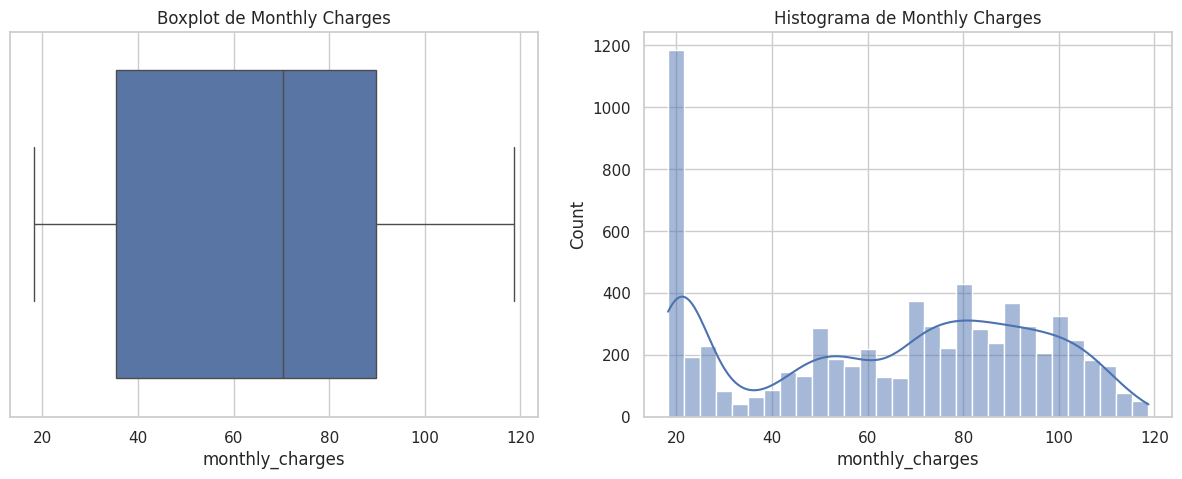

In [21]:
plt.figure(figsize=(15, 5))

# Boxplot de monthly_charges
plt.subplot(1, 2, 1)
sns.boxplot(x=df_eda['monthly_charges'])
plt.title('Boxplot de Monthly Charges')

# Histograma de monthly_charges
plt.subplot(1, 2, 2)
sns.histplot(df_eda['monthly_charges'], bins=30, kde=True)
plt.title('Histograma de Monthly Charges')

plt.show()

###### Boxplot e Histograma para total_charges

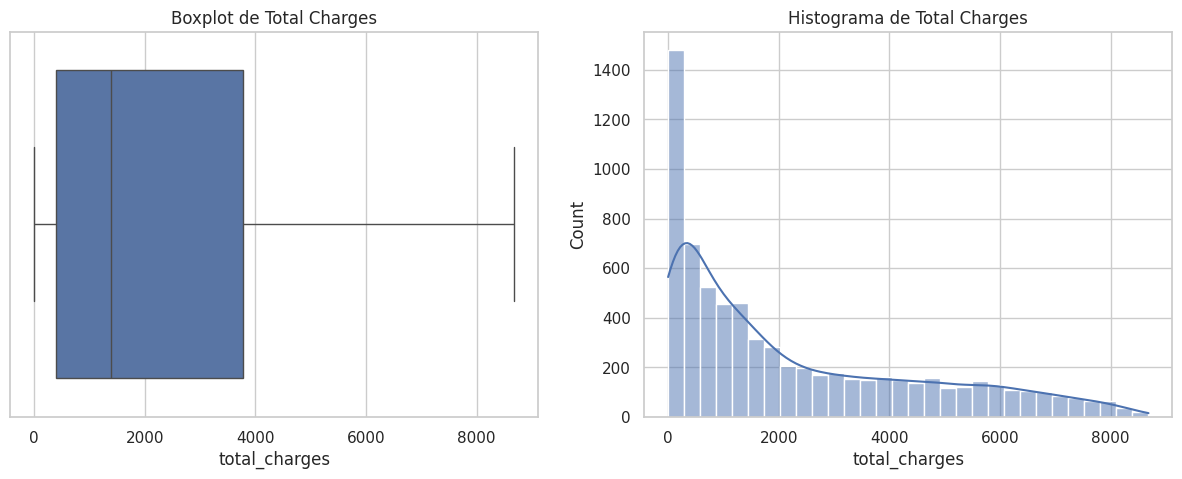

In [22]:
plt.figure(figsize=(15, 5))

# Boxplot de total_charges
plt.subplot(1, 2, 1)
sns.boxplot(x=df_eda['total_charges'])
plt.title('Boxplot de Total Charges')

# Histograma de total_charges
plt.subplot(1, 2, 2)
sns.histplot(df_eda['total_charges'], bins=30, kde=True)
plt.title('Histograma de Total Charges')

plt.show()

##### Análise Bivariada

In [23]:
# Filtrando clientes com total_charges > 4000
clientes_acima_4000 = df_eda[df_eda['total_charges'] > 4000]
print(clientes_acima_4000[['customer_id', 'begin_date', 'total_charges']].head(20))

   customer_id begin_date  total_charges
12  8091-TTVAX 2015-04-01        5681.10
13  0280-XJGEX 2015-09-01        5036.30
15  3655-SNQYZ 2014-05-01        7895.15
17  9959-WOFKT 2014-03-01        7382.25
26  6467-CHFZW 2015-12-01        4749.15
28  5248-YGIJN 2014-02-01        6369.45
30  3841-NFECX 2014-03-01        6766.95
35  6234-RAAPL 2014-02-01        7251.70
41  9489-DEDVP 2014-04-01        4872.35
43  4671-VJLCL 2014-11-01        4861.45
48  7639-LIAYI 2015-10-01        4217.80
49  2954-PIBKO 2014-05-01        4254.10
54  4667-QONEA 2015-02-01        4456.35
56  8769-KKTPH 2014-11-01        6311.20
57  5067-XJQFU 2014-08-01        7076.35
59  5954-BDFSG 2014-02-01        7853.70
60  0434-CSFON 2016-03-01        4707.10
61  1215-FIGMP 2015-02-01        5450.70
72  1891-QRQSA 2014-10-01        7099.00
75  2673-CXQEU 2015-06-01        6139.50


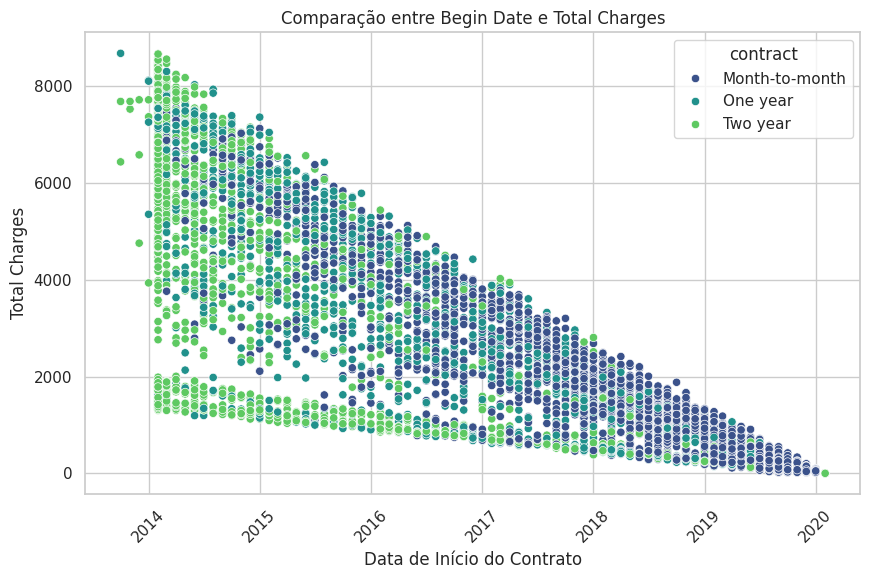

In [24]:
# Gráfico de dispersão comparando 'begin_date' e 'total_charges'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='begin_date', y='total_charges', hue='contract', palette='viridis')
plt.title('Comparação entre Begin Date e Total Charges')
plt.xlabel('Data de Início do Contrato')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.show()

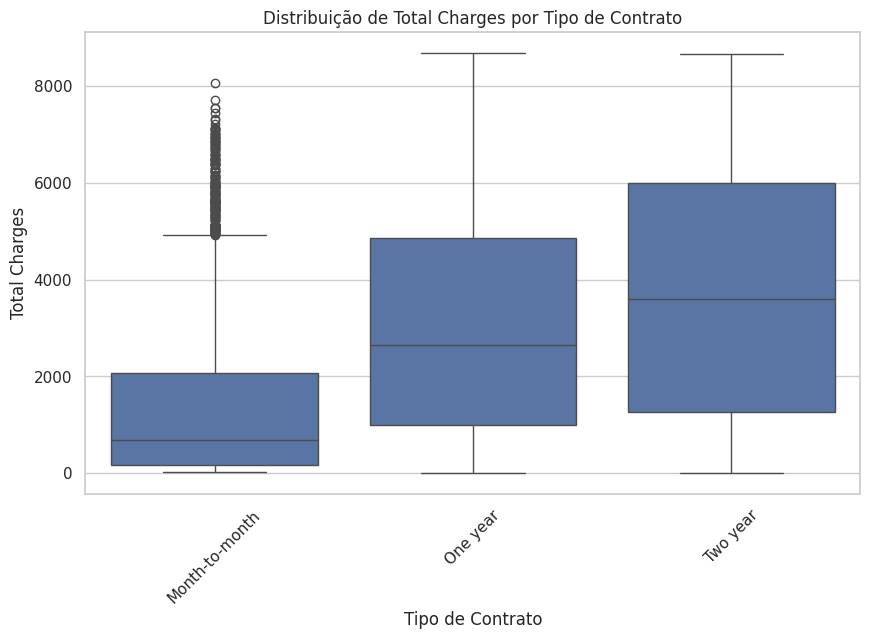

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda, x='contract', y='total_charges')
plt.title('Distribuição de Total Charges por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.show()

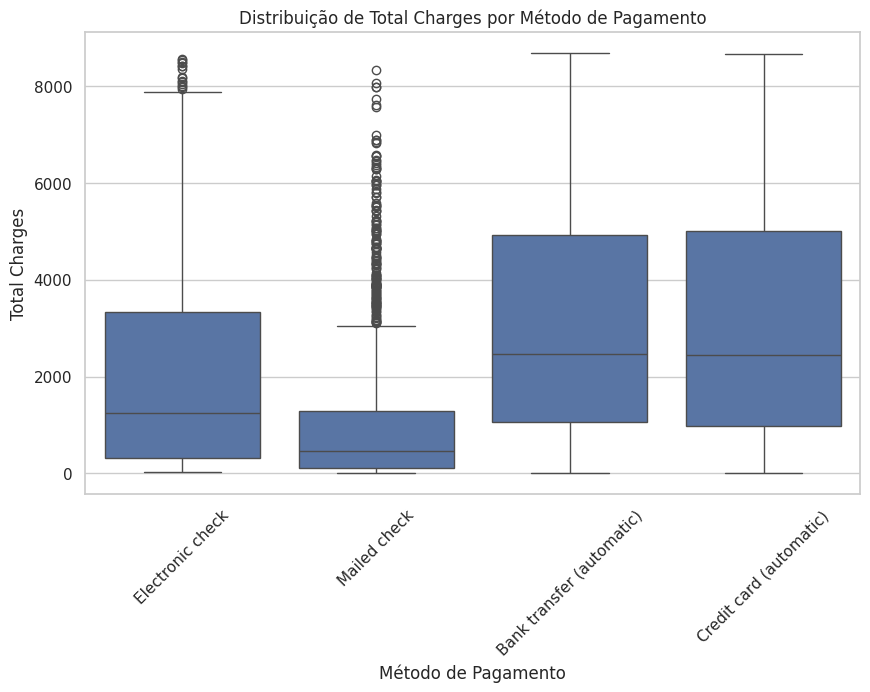

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda, x='payment_method', y='total_charges')
plt.title('Distribuição de Total Charges por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.show()


Não foram verificados outliers significantes

#### Distribuição das Variáveis Demográficas

Distribuição por Gênero (%):
 gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64


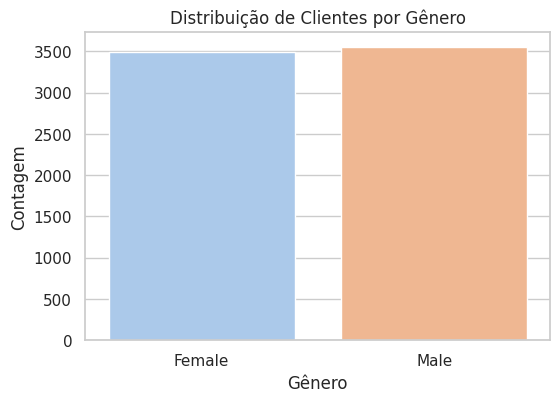

In [27]:
# Contagem e proporção de clientes por gênero
gender_distribution = df_eda['gender'].value_counts(normalize=True) * 100
print("Distribuição por Gênero (%):\n", gender_distribution)

# Gráfico de barras para a distribuição por gênero
plt.figure(figsize=(6, 4))
sns.countplot(data=df_eda, x='gender', palette='pastel')
plt.title('Distribuição de Clientes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()


Distribuição de Clientes Idosos (%):
 senior_citizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64


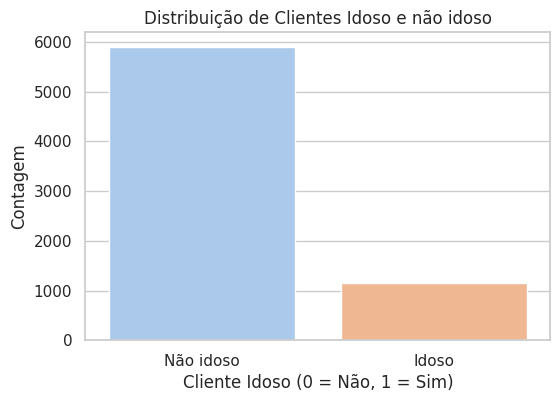

In [28]:
# Contagem e proporção de clientes idosos
senior_distribution = df_eda['senior_citizen'].value_counts(normalize=True) * 100
print("Distribuição de Clientes Idosos (%):\n", senior_distribution)

# Gráfico de barras para a distribuição de clientes idosos
plt.figure(figsize=(6, 4))
sns.countplot(data=df_eda, x='senior_citizen', palette='pastel')
plt.title('Distribuição de Clientes Idoso e não idoso')
plt.xlabel('Cliente Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não idoso', 'Idoso'])
plt.show()


Distribuição de Clientes por Estado Civil (%):
 partner
0    51.69672
1    48.30328
Name: proportion, dtype: float64
Distribuição de Clientes com Dependentes (%):
 dependents
0    70.041176
1    29.958824
Name: proportion, dtype: float64


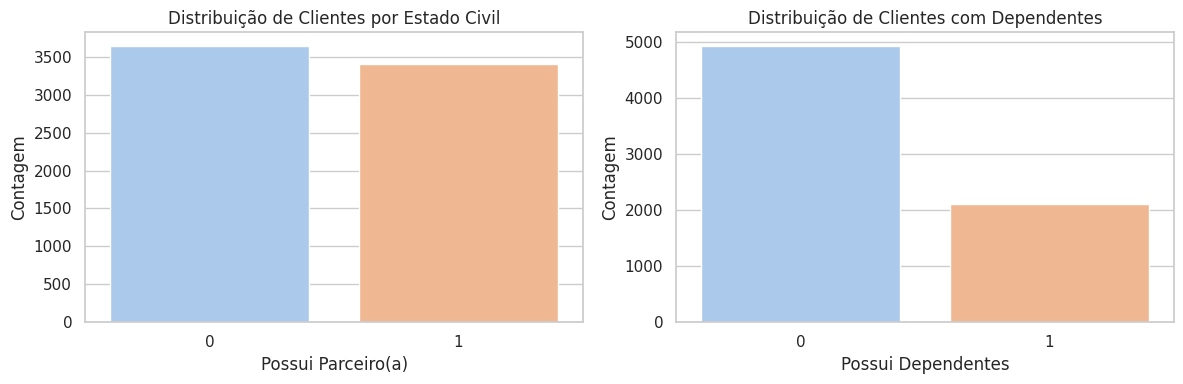

In [29]:
# Contagem e proporção de clientes por estado civil
partner_distribution = df_eda['partner'].value_counts(normalize=True) * 100
print("Distribuição de Clientes por Estado Civil (%):\n", partner_distribution)

# Contagem e proporção de clientes com dependentes
dependents_distribution = df_eda['dependents'].value_counts(normalize=True) * 100
print("Distribuição de Clientes com Dependentes (%):\n", dependents_distribution)

# Gráfico de barras para estado civil e dependentes
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df_eda, x='partner', palette='pastel', ax=ax[0])
ax[0].set_title('Distribuição de Clientes por Estado Civil')
ax[0].set_xlabel('Possui Parceiro(a)')
ax[0].set_ylabel('Contagem')

sns.countplot(data=df_eda, x='dependents', palette='pastel', ax=ax[1])
ax[1].set_title('Distribuição de Clientes com Dependentes')
ax[1].set_xlabel('Possui Dependentes')
ax[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


Distribuição das variáveis democráficas está equilibrada. Apenas um desequilíbrio na questão de idade, aonde apenas 16,21% dos clientes são idosos.

#### Análises sobre a taxa de Churn

In [30]:
# Verificar novamente se há valores nulos restantes
print(df_eda.isnull().sum())

customer_id             0
begin_date              0
end_date             5174
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
has_internet            0
has_phone               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
multiple_lines          0
dtype: int64


In [31]:
from datetime import datetime
import numpy as np

# Data "atual" para calcular o tempo de permanência
current_date = pd.to_datetime('2020-02-01')

# Substituir 'No' na coluna 'end_date' com a data atual para clientes ainda ativos
df_eda['end_date'] = df_eda['end_date'].replace('No', pd.NaT)

# Convertendo 'end_date' para datetime, e substituindo NaT por current_date para clientes ativos
df_eda['end_date'] = pd.to_datetime(df_eda['end_date'], errors='coerce')
df_eda['end_date'] = df_eda['end_date'].fillna(current_date)

# Criar coluna 'churn' (1 se 'end_date' não for igual a data atual, ou seja, se houve churn, 0 caso contrário)
df_eda['churn'] = df_eda['end_date'].apply(lambda x: 0 if x == current_date else 1)

# Convertendo 'begin_date' para datetime
df_eda['begin_date'] = pd.to_datetime(df_eda['begin_date'], errors='coerce')

# Criar coluna 'tenure' como a diferença em meses entre 'end_date' e 'begin_date'
df_eda['tenure'] = ((df_eda['end_date'] - df_eda['begin_date']).dt.days / 30).astype(int)

# Exibir as primeiras linhas para confirmar
print(df_eda[['customer_id', 'begin_date', 'end_date', 'tenure', 'churn']].head())

  customer_id begin_date   end_date  tenure  churn
0  7590-VHVEG 2020-01-01 2020-02-01       1      0
1  5575-GNVDE 2017-04-01 2020-02-01      34      0
2  3668-QPYBK 2019-10-01 2019-12-01       2      1
3  7795-CFOCW 2016-05-01 2020-02-01      45      0
4  9237-HQITU 2019-09-01 2019-11-01       2      1


In [32]:
# Número de clientes que sofreram churn
num_churn = df_eda['churn'].sum()
print(f'Número de clientes que sofreram churn: {num_churn}')

# Número de clientes que não sofreram churn
num_no_churn = (df_eda['churn'] == 0).sum()
print(f'Número de clientes que não sofreram churn: {num_no_churn}')


Número de clientes que sofreram churn: 1869
Número de clientes que não sofreram churn: 5174


In [33]:
# Criar buckets para 'monthly_charges'
df_eda['monthly_charges_bins'] = pd.cut(df_eda['monthly_charges'], bins=5)

# Criar buckets para 'total_charges'
df_eda['total_charges_bins'] = pd.qcut(df_eda['total_charges'], q=5) # Dividindo em quintis

# Exibir as primeiras linhas para confirmar os buckets
df_eda[['monthly_charges', 'monthly_charges_bins', 'total_charges', 'total_charges_bins']].head()


,monthly_charges,monthly_charges_bins,total_charges,total_charges_bins
0,29.85,"(18.15, 38.35]",29.85,"(-0.001, 265.32]"
1,56.95,"(38.35, 58.45]",1889.50,"(939.78, 2043.71]"
2,53.85,"(38.35, 58.45]",108.15,"(-0.001, 265.32]"
3,42.30,"(38.35, 58.45]",1840.75,"(939.78, 2043.71]"
4,70.70,"(58.45, 78.55]",151.65,"(-0.001, 265.32]"


In [34]:
# Taxa de churn por faixa de 'monthly_charges'
monthly_charges_churn = df_eda.groupby('monthly_charges_bins')['churn'].mean().reset_index()
monthly_charges_churn.columns = ['Monthly Charges (Faixas)', 'Taxa de Churn']

# Taxa de churn por faixa de 'total_charges'
total_charges_churn = df_eda.groupby('total_charges_bins')['churn'].mean().reset_index()
total_charges_churn.columns = ['Total Charges (Faixas)', 'Taxa de Churn']

# Exibir as taxas de churn por faixas
monthly_charges_churn, total_charges_churn


(  Monthly Charges (Faixas)  Taxa de Churn
 0           (18.15, 38.35]       0.114079
 1           (38.35, 58.45]       0.269652
 2           (58.45, 78.55]       0.294806
 3           (78.55, 98.65]       0.369660
 4          (98.65, 118.75]       0.300573,
   Total Charges (Faixas)  Taxa de Churn
 0       (-0.001, 265.32]       0.457771
 1       (265.32, 939.78]       0.289062
 2      (939.78, 2043.71]       0.208659
 3     (2043.71, 4471.44]       0.230114
 4      (4471.44, 8684.8]       0.141235)

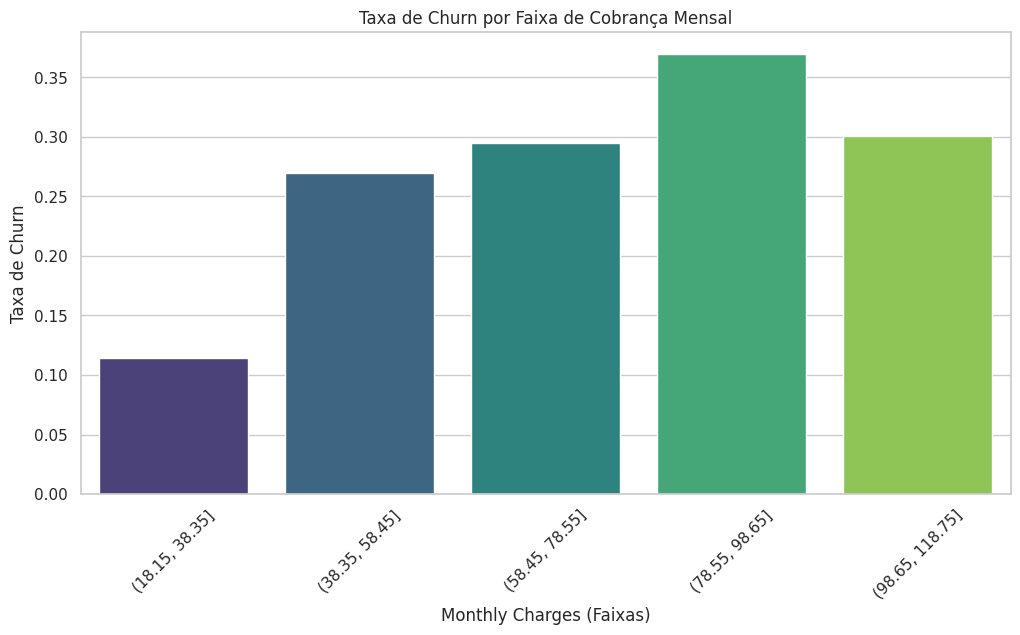

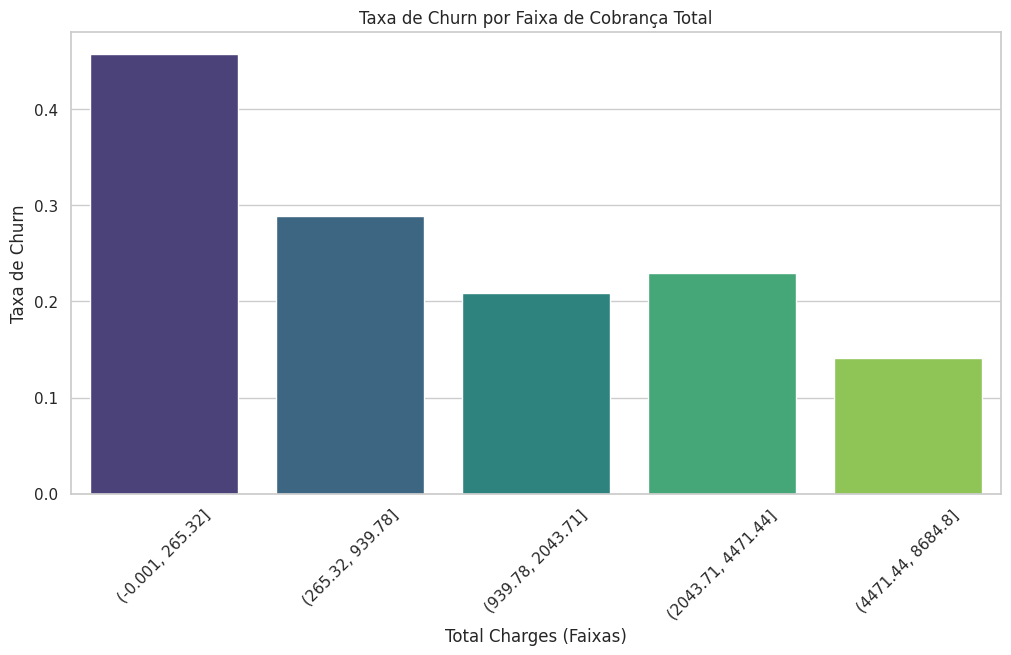

In [35]:
# Gráfico de barras para 'monthly_charges'
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_charges_churn, x='Monthly Charges (Faixas)', y='Taxa de Churn', palette='viridis')
plt.title('Taxa de Churn por Faixa de Cobrança Mensal')
plt.ylabel('Taxa de Churn')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'total_charges'
plt.figure(figsize=(12, 6))
sns.barplot(data=total_charges_churn, x='Total Charges (Faixas)', y='Taxa de Churn', palette='viridis')
plt.title('Taxa de Churn por Faixa de Cobrança Total')
plt.ylabel('Taxa de Churn')
plt.xticks(rotation=45)
plt.show()


**Interpretação:**

- A taxa de churn tende a aumentar com o aumento dos valores cobrados mensalmente até a faixa (78.55, 98.65]. Isso pode indicar que clientes com cobranças mensais mais altas têm uma tendência maior a cancelar os serviços.
- Após a faixa (98.65, 118.75], a taxa de churn diminui um pouco, mas ainda está relativamente alta. Isso pode sugerir que clientes nesta faixa estão mais satisfeitos ou que são um grupo mais seleto com maior fidelização.
- A taxa de churn é mais alta na faixa mais baixa de total_charges, possivelmente representando clientes que usaram o serviço por um curto período.
- Conforme o valor total cobrado aumenta, a taxa de churn diminui, especialmente após 939.78, sugerindo que clientes com um histórico de uso mais longo e maiores gastos tendem a ser mais fiéis.
- Na última faixa (4471.44, 8684.8], a taxa de churn é a mais baixa (14,1%), indicando que clientes com altos gastos totais têm menor propensão a cancelar.

Essas análises ajudam a identificar quais grupos de clientes são mais propensos a churn e podem direcionar estratégias para melhorar a retenção, como focar em clientes com cobranças mensais mais altas ou intervenções mais cedo para clientes com total_charges baixos.

##### Análise da taxa de Churn pelas variáveis categóricas


   Gênero  Taxa de Churn
0  Female       0.269209
1    Male       0.261603


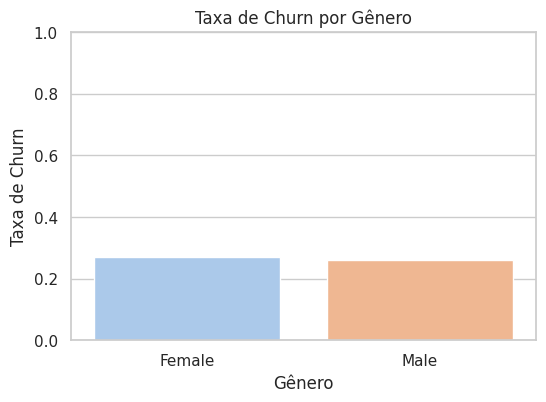

In [36]:
# Analisando a taxa de churn por gênero
gender_churn = df_eda.groupby('gender')['churn'].mean().reset_index()
gender_churn.columns = ['Gênero', 'Taxa de Churn']

# Exibindo o resultado
print(gender_churn)

# Visualizando a taxa de churn por gênero em um gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_churn, x='Gênero', y='Taxa de Churn', palette='pastel')
plt.title('Taxa de Churn por Gênero')
plt.ylabel('Taxa de Churn')
plt.xlabel('Gênero')
plt.ylim(0, 1)
plt.show()

In [37]:
# Taxa de churn por status de idoso (senior_citizen)
senior_churn = df_eda.groupby('senior_citizen')['churn'].mean().reset_index()
senior_churn.columns = ['Senior Citizen', 'Taxa de Churn']

# Taxa de churn por status cônjuge (partner)
partner_churn = df_eda.groupby('partner')['churn'].mean().reset_index()
partner_churn.columns = ['Partner', 'Taxa de Churn']

# Taxa de churn por dependentes (dependents)
dependents_churn = df_eda.groupby('dependents')['churn'].mean().reset_index()
dependents_churn.columns = ['Dependents', 'Taxa de Churn']

# Exibir os resultados
printmd("Taxa de Churn por Senior Citizen:")
print(senior_churn, "\n")

printmd("Taxa de Churn por Partner:")
print(partner_churn, "\n")

printmd("Taxa de Churn por Dependents:")
print(dependents_churn)

Taxa de Churn por Senior Citizen:

   Senior Citizen  Taxa de Churn
0               0       0.236062
1               1       0.416813 



Taxa de Churn por Partner:

   Partner  Taxa de Churn
0        0       0.329580
1        1       0.196649 



Taxa de Churn por Dependents:

   Dependents  Taxa de Churn
0           0       0.312791
1           1       0.154502


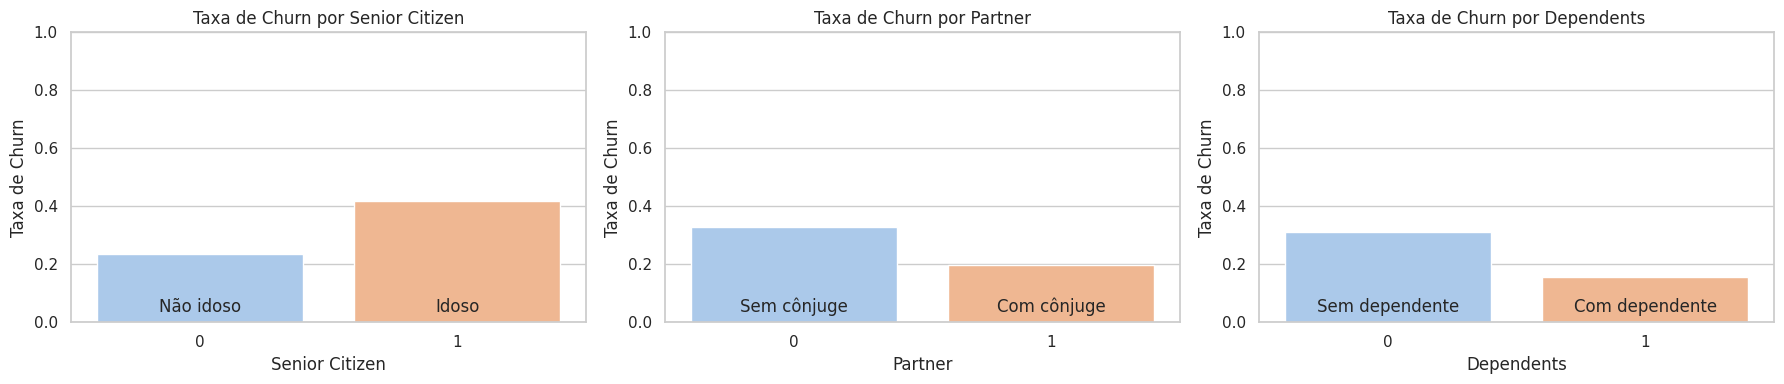

In [38]:
# Visualização
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Gráfico para Senior Citizen
sns.barplot(data=senior_churn, x='Senior Citizen', y='Taxa de Churn', ax=axes[0], palette='pastel')
axes[0].set_title('Taxa de Churn por Senior Citizen')
axes[0].set_xlabel('Senior Citizen')
axes[0].set_ylabel('Taxa de Churn')
axes[0].set_ylim(0, 1)

# Adicionando rótulos nas barras
axes[0].text(0, 0.02, 'Não idoso', ha='center', va='bottom')
axes[0].text(1, 0.02, 'Idoso', ha='center', va='bottom')

# Gráfico para Partner
sns.barplot(data=partner_churn, x='Partner', y='Taxa de Churn', ax=axes[1], palette='pastel')
axes[1].set_title('Taxa de Churn por Partner')
axes[1].set_xlabel('Partner')
axes[1].set_ylabel('Taxa de Churn')
axes[1].set_ylim(0, 1)

# Adicionando rótulos nas barras
axes[1].text(0, 0.02, 'Sem cônjuge', ha='center', va='bottom')
axes[1].text(1, 0.02, 'Com cônjuge', ha='center', va='bottom')

# Gráfico para Dependents
sns.barplot(data=dependents_churn, x='Dependents', y='Taxa de Churn', ax=axes[2], palette='pastel')
axes[2].set_title('Taxa de Churn por Dependents')
axes[2].set_xlabel('Dependents')
axes[2].set_ylabel('Taxa de Churn')
axes[2].set_ylim(0, 1)

# Adicionando rótulos nas barras
axes[2].text(0, 0.02, 'Sem dependente', ha='center', va='bottom')
axes[2].text(1, 0.02, 'Com dependente', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Interpretação:**

Esses resultados mostram algumas variações significativas nas taxas de churn para diferentes grupos:

- Gender (Gênero): Não há muita variação entre os gêneros.
- Senior Citizen (Idoso): Clientes que são idosos têm uma taxa de churn muito maior (41,68%) comparada aos não-idosos (23,61%).
- Partner (Cônjuge): Clientes sem cônjuge têm uma taxa de churn de 32,96%, enquanto clientes com cônjuge apresentam uma taxa bem menor, de 19,66%.
- Dependents (Dependentes): Clientes sem dependentes têm uma taxa de churn de 31,28%, enquanto aqueles com dependentes têm uma taxa significativamente mais baixa, de 15,45%.

Essas diferenças indicam que a presença de dependentes e parceiros está associada a menores taxas de churn, possivelmente porque esses clientes têm uma conexão mais forte com a empresa. Por outro lado, clientes idosos parecem ser mais propensos a cancelar os serviços.

In [39]:
import ipywidgets as widgets
from IPython.display import display, HTML

def churn_rate_per_category(df, target_var='churn'):
    """
    Calcula a taxa de churn para todas as variáveis categóricas.

    Parâmetros:
    df
    target_var (str)

    Retorna:
    dict: Dicionário com a taxa de churn para cada variável categórica.
    """
    # Identificar variáveis categóricas
    cat_vars = df.select_dtypes(include=['object', 'category', 'bool']).columns
    cat_vars = [var for var in cat_vars if var != target_var and var != 'customer_id']  # Excluir 'churn' e 'customer_id'

    # Dicionário para armazenar resultados
    churn_rates = {}

    # Iterar sobre cada variável categórica e calcular a taxa de churn
    for var in cat_vars:
        churn_rate = df.groupby(var)[target_var].mean().reset_index()
        churn_rate.columns = [var, 'Taxa de Churn']
        churn_rates[var] = churn_rate

    return churn_rates

In [40]:
# Aplicar a função ao df_eda e armazenar os resultados
churn_rates_by_category = churn_rate_per_category(df_eda)

# Criar um dropdown com as variáveis categóricas
dropdown = widgets.Dropdown(
    options=churn_rates_by_category.keys(),
    description='Variável:',
    disabled=False
)

# Função para exibir a tabela e o gráfico
def plot_churn_rate(selected_var):
    table = churn_rates_by_category[selected_var]

    # Exibir a tabela de valores
    display(HTML(f"<b>Taxa de Churn por {selected_var}:</b>"))
    display(table)
    print("\n" + "-"*40 + "\n")

    # Plotar o gráfico
    plt.figure(figsize=(8, 6))
    sns.barplot(data=table, x=selected_var, y='Taxa de Churn', palette='pastel')
    plt.title(f'Taxa de Churn por {selected_var}')
    plt.ylabel('Taxa de Churn')
    plt.xlabel(selected_var)
    plt.xticks(rotation=45)
    plt.show()

# Conectar o dropdown à função de plotagem usando interactive
interactive_plot = widgets.interactive(plot_churn_rate, selected_var=dropdown)

# Exibir o widget sem mostrar o nome da função
display(interactive_plot)

interactive(children=(Dropdown(description='Variável:', options=('contract', 'payment_method', 'has_internet',…

**Considerações Gerais:**

- Tipo de contrato e método de pagamento: Indicam que maior compromisso e conveniência no pagamento estão relacionados à menor taxa de churn.
- Serviço de internet: A insatisfação com o serviço de internet parece ser um fator crítico na decisão de cancelar o serviço, especialmente entre usuários de fibra óptica.
- Sem internet ou telefone: Clientes sem esses serviços têm menores taxas de churn, mas isso pode ser porque eles estão menos expostos a problemas que causam cancelamento.

##### Análise do Caráter Temporal (tenure)

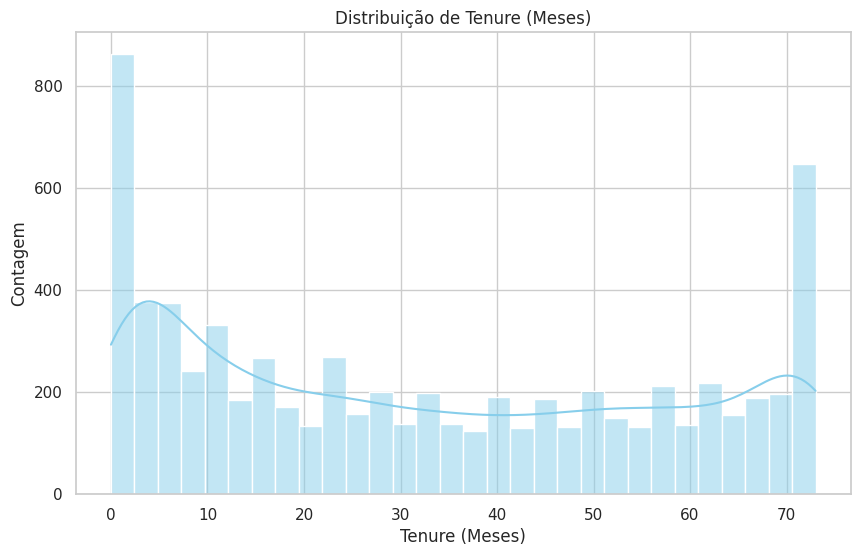

In [41]:
# Distribuição de tenure
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Tenure (Meses)')
plt.xlabel('Tenure (Meses)')
plt.ylabel('Contagem')
plt.show()


  Tenure (Meses)  Taxa de Churn
0  (-0.073, 7.3]       0.517990
1    (7.3, 14.6]       0.347826
2   (14.6, 21.9]       0.296491
3   (21.9, 29.2]       0.224522
4   (29.2, 36.5]       0.215645
5   (36.5, 43.8]       0.220721
6   (43.8, 51.1]       0.153846
7   (51.1, 58.4]       0.147773
8   (58.4, 65.7]       0.086275
9   (65.7, 73.0]       0.060987


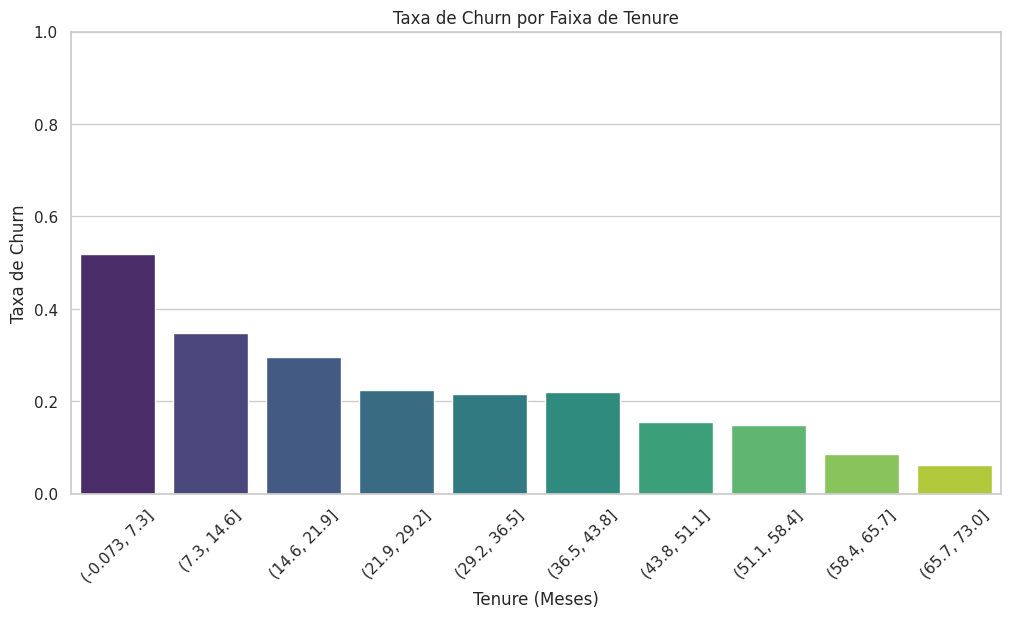

In [42]:
# Criar buckets para 'tenure' usando pd.cut
df_eda['tenure_bins'] = pd.cut(df_eda['tenure'], bins=10)  # Dividindo em 10 faixas

# Calcular a taxa de churn por faixa de 'tenure'
tenure_churn = df_eda.groupby('tenure_bins')['churn'].mean().reset_index()
tenure_churn.columns = ['Tenure (Meses)', 'Taxa de Churn']

# Exibir as taxas de churn por faixa de tenure
print(tenure_churn)

# Visualizar a taxa de churn por faixa de tenure
plt.figure(figsize=(12, 6))
sns.barplot(data=tenure_churn, x='Tenure (Meses)', y='Taxa de Churn', palette='viridis')
plt.title('Taxa de Churn por Faixa de Tenure')
plt.xlabel('Tenure (Meses)')
plt.ylabel('Taxa de Churn')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


- Clientes com menor tempo de permanência (0 a 7.3 meses) têm uma taxa de churn muito alta, de 51.8%. Isso sugere que a rotatividade é especialmente crítica logo nos primeiros meses.

- A taxa de churn diminui à medida que o tempo de permanência aumenta. Para clientes entre 7.3 e 21.9 meses, a taxa cai para 29.6%, mostrando uma tendência de estabilização.

- A taxa de churn continua a cair em clientes com maior tempo de permanência, alcançando valores mais baixos, como 15.3% entre 43.8 e 51.1 meses.

- O churn é notavelmente baixo para clientes com mais de 58.4 meses de permanência, sendo de apenas 8.6% e caindo ainda mais para 6.1% entre os que estão acima de 65.7 meses.

**Interpretação:**

- Altíssimo churn nos primeiros meses: É crucial entender por que novos clientes estão saindo tão rapidamente. Oferecer um suporte especial nos primeiros meses pode ajudar a reduzir isso.
- Estabilização ao longo do tempo: Após cerca de 2 anos (24 meses), a taxa de churn se estabiliza e diminui, sugerindo que clientes mais antigos são menos propensos a sair.

#### Análise de correlação das variáveis importantes


In [43]:
# Criar uma cópia do df_eda
df_merged_copy = df_merged.copy()

In [44]:
# Definir a data final do dataset para os clientes ativos
final_date = df_merged_copy['begin_date'].max()

# Criar a coluna 'tenure' (em meses) calculando a diferença entre end_date e begin_date
df_merged_copy['tenure'] = (df_merged_copy['end_date'].fillna(final_date) - df_merged_copy['begin_date']).dt.days // 30

# Criar a coluna 'churn' (0 = cliente ativo, 1 = cliente cancelado)
df_merged_copy['churn'] = df_merged_copy['end_date'].notna().astype(int)

In [45]:
# Remover a coluna 'customer_id'
df_merged_copy = df_merged_copy.drop(columns=['customer_id', 'end_date', 'begin_date'])

In [46]:
# Codificar variáveis categóricas usando get_dummies (one-hot encoding)
df_merged_copy_encoded = pd.get_dummies(df_merged_copy, drop_first=True)

# Selecionar todas as variáveis agora (numéricas e categóricas codificadas)
all_vars = df_merged_copy_encoded.columns

# Calcular a correlação com 'churn'
correlation_all = df_merged_copy_encoded.corr()['churn'].sort_values(ascending=False)

# Exibir a correlação
print("Correlação das Variáveis com Churn:")
print(correlation_all)

Correlação das Variáveis com Churn:
churn                                     1.000000
internet_service_Fiber optic              0.308020
payment_method_Electronic check           0.301919
has_internet                              0.227890
monthly_charges                           0.193356
paperless_billing                         0.191825
senior_citizen                            0.150889
streaming_tv                              0.063228
streaming_movies                          0.061382
multiple_lines                            0.040102
has_phone                                 0.011942
gender_Male                              -0.008612
device_protection                        -0.066160
online_backup                            -0.082255
payment_method_Mailed check              -0.091683
payment_method_Credit card (automatic)   -0.134302
partner                                  -0.150448
dependents                               -0.164221
tech_support                             -0.16

**Variáveis com correlação positiva:**

- internet_service_Fiber optic (0.31): A presença de serviço de internet via fibra óptica está associada a uma maior taxa de churn. Isso pode indicar que, apesar da alta qualidade do serviço, os clientes podem estar insatisfeitos com outros aspectos, como custo ou suporte.
- payment_method_Electronic check (0.30): Clientes que optam por pagamento eletrônico apresentam uma maior probabilidade de churn. Essa escolha pode estar ligada a características de comportamento ou satisfação com o serviço.
- monthly_charges (0.19): Clientes com cobranças mensais mais altas tendem a ter uma maior taxa de churn. Isso sugere que o custo pode ser um fator importante na decisão de deixar a empresa.
- paperless_billing (0.19): A cobrança sem papel também está associada a um aumento no churn. Pode ser interessante investigar se isso está relacionado ao perfil dos clientes ou à experiência com o método.
- senior_citizen (0.15): Clientes mais velhos tendem a apresentar uma taxa de churn mais alta, o que pode indicar que serviços ou preços não estão atendendo a esse público adequadamente.

**Variáveis com correlação negativa:**
- tenure (-0.35): A variável mais fortemente correlacionada negativamente com churn. Quanto mais tempo o cliente permanece, menor a probabilidade de churn, confirmando a análise anterior.
- total_charges (-0.20): Clientes que já pagaram mais (geralmente devido a um tempo maior de permanência) têm menor churn, o que está alinhado com a correlação negativa com tenure.
- online_security (-0.17), tech_support (-0.16), dependents (-0.16), partner (-0.15): Clientes que têm segurança online, suporte técnico, dependentes ou são parceiros tendem a churnar menos. Isso pode sugerir que esses serviços ajudam a reter clientes.
- contract_One year (-0.18): Clientes com contrato de um ano também mostram menor probabilidade de churn em comparação com aqueles sem contrato, embora não seja tão forte quanto o contrato de dois anos.
- internet_service_No (-0.23): A ausência de um serviço de internet está associada a um menor churn.

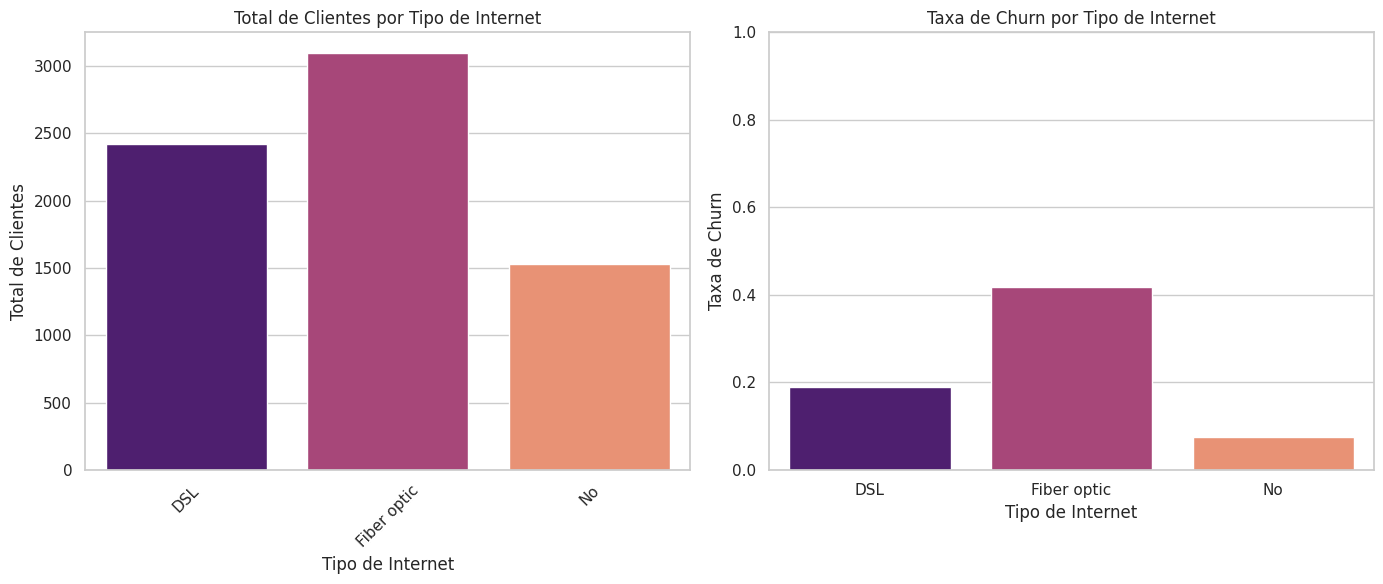

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular o total de clientes por tipo de internet
total_clients = df_eda['internet_service'].value_counts().reset_index()
total_clients.columns = ['internet_service', 'total_clients']

# Calcular a taxa de churn por tipo de internet
churn_rates = df_eda.groupby('internet_service')['churn'].mean().reset_index()
churn_rates.columns = ['internet_service', 'churn_rate']

# Juntar os dois DataFrames
summary = pd.merge(total_clients, churn_rates, on='internet_service')

# Criar os gráficos lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de total de clientes
sns.barplot(data=summary, x='internet_service', y='total_clients', ax=axes[0], palette='magma')
axes[0].set_title('Total de Clientes por Tipo de Internet')
axes[0].set_xlabel('Tipo de Internet')
axes[0].set_ylabel('Total de Clientes')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Gráfico de taxa de churn
sns.barplot(data=summary, x='internet_service', y='churn_rate', ax=axes[1], palette='magma')
axes[1].set_title('Taxa de Churn por Tipo de Internet')
axes[1].set_xlabel('Tipo de Internet')
axes[1].set_ylabel('Taxa de Churn')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


##### Identificação de subgrupos com maior propenso ao Churn

- Contrato Mensal + Cheque Eletrônico (53.7%): Este subgrupo apresenta a maior taxa de churn. O uso de contratos mensais e o pagamento por cheque eletrônico parecem ser fortes indicadores de rotatividade, provavelmente devido à flexibilidade do contrato e à insatisfação com o método de pagamento.

- Contrato Anual + Bank Transfer (9.7%): Este subgrupo apresenta uma taxa de churn significativamente menor, sugerindo que contratos de longo prazo e pagamentos automáticos via transferência bancária estão associados a uma maior retenção de clientes.

- Contrato Bianual + Credit Card (2.2%): Este subgrupo tem a menor taxa de churn, indicando que clientes com compromissos de longo prazo e pagamentos automáticos por cartão de crédito estão altamente satisfeitos ou estão menos propensos a cancelar o serviço.

Contrato Mensal + Cheque Eletrônico: 1850 registros
Contrato Anual + Bank Transfer: 391 registros
Contrato Bianual + Credit Card: 581 registros
Sem Internet + Telefone: 1526 registros
Internet com Serviço (DSL) + Telefone: 1739 registros
Internet com Serviço (Fiber optic) + Telefone: 3096 registros
Internet com Serviço (DSL) + Sem Telefone: 682 registros
                                        Subgrupo  Taxa de Churn
0            Contrato Mensal + Cheque Eletrônico       0.537297
1                 Contrato Anual + Bank Transfer       0.097187
2                 Contrato Bianual + Credit Card       0.022375
3                        Sem Internet + Telefone       0.074050
4          Internet com Serviço (DSL) + Telefone       0.166187
5  Internet com Serviço (Fiber optic) + Telefone       0.418928
6      Internet com Serviço (DSL) + Sem Telefone       0.249267


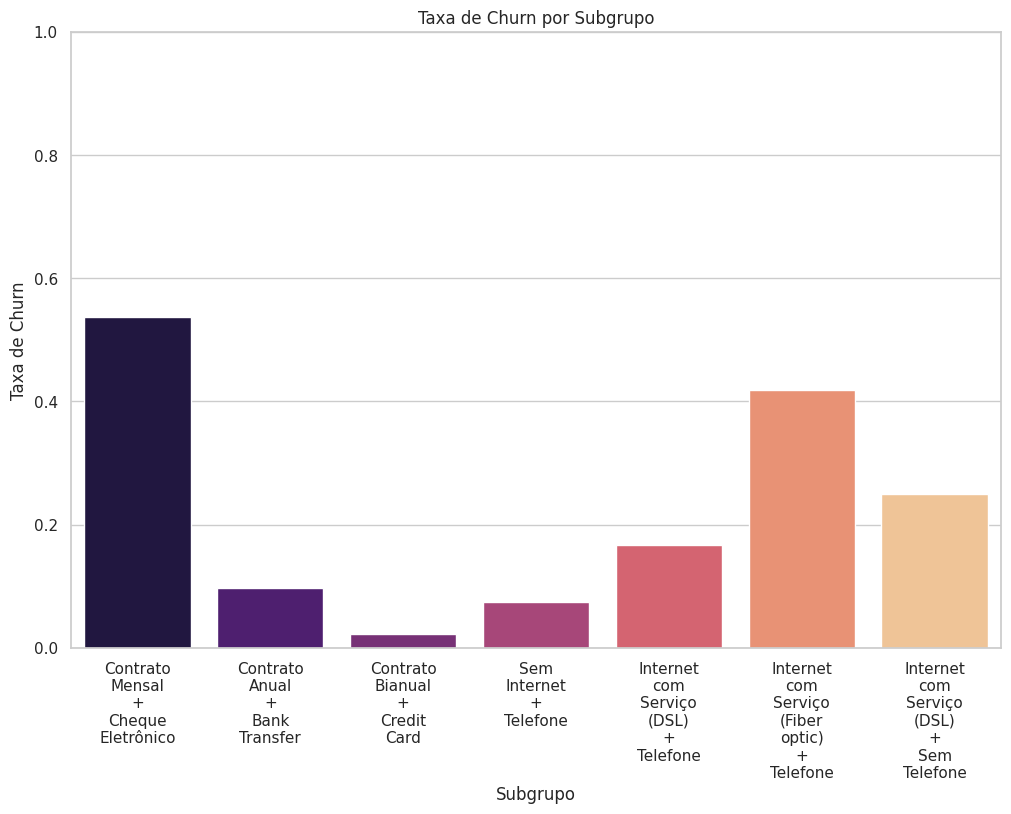

In [48]:
# Criar subgrupos baseados em variáveis importantes, incluindo internet_service e has_phone
subgroups = {
    'Contrato Mensal + Cheque Eletrônico': df_merged_copy[(df_merged_copy['contract'] == 'Month-to-month') & (df_merged_copy['payment_method'] == 'Electronic check')],
    'Contrato Anual + Bank Transfer': df_merged_copy[(df_merged_copy['contract'] == 'One year') & (df_merged_copy['payment_method'] == 'Bank transfer (automatic)')],
    'Contrato Bianual + Credit Card': df_merged_copy[(df_merged_copy['contract'] == 'Two year') & (df_merged_copy['payment_method'] == 'Credit card (automatic)')],
    'Sem Internet + Telefone': df_merged_copy[(df_merged_copy['internet_service'] == 'No') & (df_merged_copy['has_phone'] == True)],
    'Internet com Serviço (DSL) + Telefone': df_merged_copy[(df_merged_copy['internet_service'] == 'DSL') & (df_merged_copy['has_phone'] == True)],
    'Internet com Serviço (Fiber optic) + Telefone': df_merged_copy[(df_merged_copy['internet_service'] == 'Fiber optic') & (df_merged_copy['has_phone'] == True)],
    'Internet com Serviço (DSL) + Sem Telefone': df_merged_copy[(df_merged_copy['internet_service'] == 'DSL') & (df_merged_copy['has_phone'] == False)],
}

# Verificar a contagem de registros em cada subgrupo
for name, subgroup in subgroups.items():
    print(f"{name}: {len(subgroup)} registros")

# Calcular as taxas de churn para cada subgrupo
subgroup_churn_rates = {name: subgroup['churn'].mean() for name, subgroup in subgroups.items()}

# Converter para DataFrame
subgroup_churn_df = pd.DataFrame(list(subgroup_churn_rates.items()), columns=['Subgrupo', 'Taxa de Churn'])

# Exibir as taxas de churn por subgrupo
print(subgroup_churn_df)

# Visualizar as taxas de churn por subgrupo
plt.figure(figsize=(12, 8))
sns.barplot(data=subgroup_churn_df, x='Subgrupo', y='Taxa de Churn', palette='magma')
plt.title('Taxa de Churn por Subgrupo')
plt.xlabel('Subgrupo')
plt.ylabel('Taxa de Churn')
plt.ylim(0, 1)

# Quebrar linha nos rótulos do eixo x
plt.xticks(ticks=range(len(subgroup_churn_df)), labels=[name.replace(' ', '\n') for name in subgroup_churn_df['Subgrupo']], rotation=0)

plt.show()


- Contratos de longo prazo (anual ou bianual) e métodos de pagamento automáticos (cartão de crédito e transferência bancária) parecem reduzir significativamente o churn. Essas opções incentivam a retenção, possivelmente porque exigem menos interação do cliente para continuar com o serviço.

- Contratos mensais e o uso de cheque eletrônico estão fortemente associados a um churn mais alto. Esses clientes têm mais flexibilidade para cancelar e podem achar o método de pagamento inconveniente.

- Serviços de internet, particularmente com fibra óptica, apresentam um churn mais alto, especialmente quando combinados com contratos de curto prazo. Isso pode sugerir insatisfação com a qualidade ou custo do serviço de fibra óptica.

- Pacotes combinados de serviços (internet + telefone) têm menor churn do que a internet sozinha, sugerindo que clientes que contratam mais de um serviço podem ser mais fiéis.

## Parte 2 - Modelagem

### Pré-processamento geral

In [49]:
# Exibir as primeiras linhas do df_merged
print(df_merged.head())

# Exibir o resumo das colunas, tipos de dados e valores ausentes
print(df_merged.info())

# Verificar valores ausentes
print(df_merged.isnull().sum())

# Verificar as estatísticas descritivas do DataFrame
print(df_merged.describe(include='all'))

  customer_id begin_date   end_date        contract  paperless_billing  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month                  1   
1  5575-GNVDE 2017-04-01        NaT        One year                  0   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month                  1   
3  7795-CFOCW 2016-05-01        NaT        One year                  0   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month                  1   

              payment_method  monthly_charges  total_charges  has_internet  \
0           Electronic check            29.85          29.85          True   
1               Mailed check            56.95        1889.50          True   
2               Mailed check            53.85         108.15          True   
3  Bank transfer (automatic)            42.30        1840.75          True   
4           Electronic check            70.70         151.65          True   

   has_phone  ... partner  dependents  internet_service  online_security  \
0      Fal

### Engenharia de Features

#### Criação as colunas Tenure e Churn

In [50]:
# Definir a data final do dataset para os clientes ativos
final_date = df_merged['begin_date'].max()

# Criar a coluna 'tenure' (em meses) calculando a diferença entre end_date e begin_date
df_merged['tenure'] = (df_merged['end_date'].fillna(final_date) - df_merged['begin_date']).dt.days // 30

# Criar a coluna 'churn' (0 = cliente ativo, 1 = cliente cancelado)
df_merged['churn'] = df_merged['end_date'].notna().astype(int)

# Exibir as primeiras linhas para verificar as novas colunas
print(df_merged[['customer_id', 'begin_date', 'end_date', 'tenure', 'churn']].head())

  customer_id begin_date   end_date  tenure  churn
0  7590-VHVEG 2020-01-01        NaT       1      0
1  5575-GNVDE 2017-04-01        NaT      34      0
2  3668-QPYBK 2019-10-01 2019-12-01       2      1
3  7795-CFOCW 2016-05-01        NaT      45      0
4  9237-HQITU 2019-09-01 2019-11-01       2      1


 #### Codificação das variáveis categóricas

In [51]:
# Aplicando One-Hot Encoding
df_encoded = pd.get_dummies(
    df_merged,
    columns=['contract', 'payment_method', 'internet_service', 'gender'],
    drop_first=True
)

# Verificando o DataFrame codificado
print(df_encoded.head())


  customer_id begin_date   end_date  paperless_billing  monthly_charges  \
0  7590-VHVEG 2020-01-01        NaT                  1            29.85   
1  5575-GNVDE 2017-04-01        NaT                  0            56.95   
2  3668-QPYBK 2019-10-01 2019-12-01                  1            53.85   
3  7795-CFOCW 2016-05-01        NaT                  0            42.30   
4  9237-HQITU 2019-09-01 2019-11-01                  1            70.70   

   total_charges  has_internet  has_phone  senior_citizen  partner  ...  \
0          29.85          True      False               0        1  ...   
1        1889.50          True       True               0        0  ...   
2         108.15          True       True               0        0  ...   
3        1840.75          True      False               0        0  ...   
4         151.65          True       True               0        0  ...   

   tenure  churn  contract_One year  contract_Two year  \
0       1      0              False     

In [52]:
# Exibir o resumo das colunas, tipos de dados e valores ausentes
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_id                             7043 non-null   object        
 1   begin_date                              7043 non-null   datetime64[ns]
 2   end_date                                1869 non-null   datetime64[ns]
 3   paperless_billing                       7043 non-null   int64         
 4   monthly_charges                         7043 non-null   float64       
 5   total_charges                           7043 non-null   float64       
 6   has_internet                            7043 non-null   bool          
 7   has_phone                               7043 non-null   bool          
 8   senior_citizen                          7043 non-null   int64         
 9   partner                                 7043 non-nul

In [53]:
# Identificando automaticamente as colunas booleanas
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns

# Convertendo as colunas booleanas para 0/1
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

# Verificando o DataFrame atualizado
print(df_encoded.head())

  customer_id begin_date   end_date  paperless_billing  monthly_charges  \
0  7590-VHVEG 2020-01-01        NaT                  1            29.85   
1  5575-GNVDE 2017-04-01        NaT                  0            56.95   
2  3668-QPYBK 2019-10-01 2019-12-01                  1            53.85   
3  7795-CFOCW 2016-05-01        NaT                  0            42.30   
4  9237-HQITU 2019-09-01 2019-11-01                  1            70.70   

   total_charges  has_internet  has_phone  senior_citizen  partner  ...  \
0          29.85             1          0               0        1  ...   
1        1889.50             1          1               0        0  ...   
2         108.15             1          1               0        0  ...   
3        1840.75             1          0               0        0  ...   
4         151.65             1          1               0        0  ...   

   tenure  churn  contract_One year  contract_Two year  \
0       1      0                  0     

In [54]:
# Criar uma nova feature para total de serviços contratados
df_encoded['total_services'] = (
    df_encoded[['has_internet', 'has_phone', 'streaming_tv', 'streaming_movies']]
    .sum(axis=1)
)

In [55]:
# Criar uma nova feature de valor por serviço contratado
df_encoded['charges_per_service'] = df_encoded['monthly_charges'] / df_encoded['total_services']
# Substituir valores infinitos resultantes de divisões por zero
df_encoded['charges_per_service'].replace([np.inf, -np.inf], 0, inplace=True)


In [56]:
# Criar uma nova feature de proporção do tempo de contrato pelo total de cobranças
#df_encoded['tenure_charge_ratio'] = df_encoded['tenure'] / df_encoded['total_charges']
df_encoded['tenure_charge_ratio'] = np.where(
    df_encoded['total_charges'] != 0,
    df_encoded['tenure'] / df_encoded['total_charges'],
    0
)

# Substituir valores infinitos resultantes de divisões por zero
df_encoded['tenure_charge_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

In [57]:
# Exibir as primeiras linhas das colunas geradas
print(df_encoded[['total_services', 'charges_per_service', 'tenure_charge_ratio']].head())

# Exibir estatísticas descritivas das novas colunas
print(df_encoded[['total_services', 'charges_per_service', 'tenure_charge_ratio']].describe())


   total_services  charges_per_service  tenure_charge_ratio
0               1               29.850             0.033501
1               2               28.475             0.017994
2               2               26.925             0.018493
3               1               42.300             0.024447
4               2               35.350             0.013188
       total_services  charges_per_service  tenure_charge_ratio
count     7043.000000          7043.000000          7043.000000
mean         2.458753            26.402869             0.021823
std          1.122867             6.375985             0.015049
min          1.000000            14.650000             0.000000
25%          1.000000            20.850000             0.011118
50%          2.000000            25.200000             0.014203
75%          3.000000            29.650000             0.027593
max          4.000000            48.500000             0.072595


#### Verificação da distribuição das Features e do Target

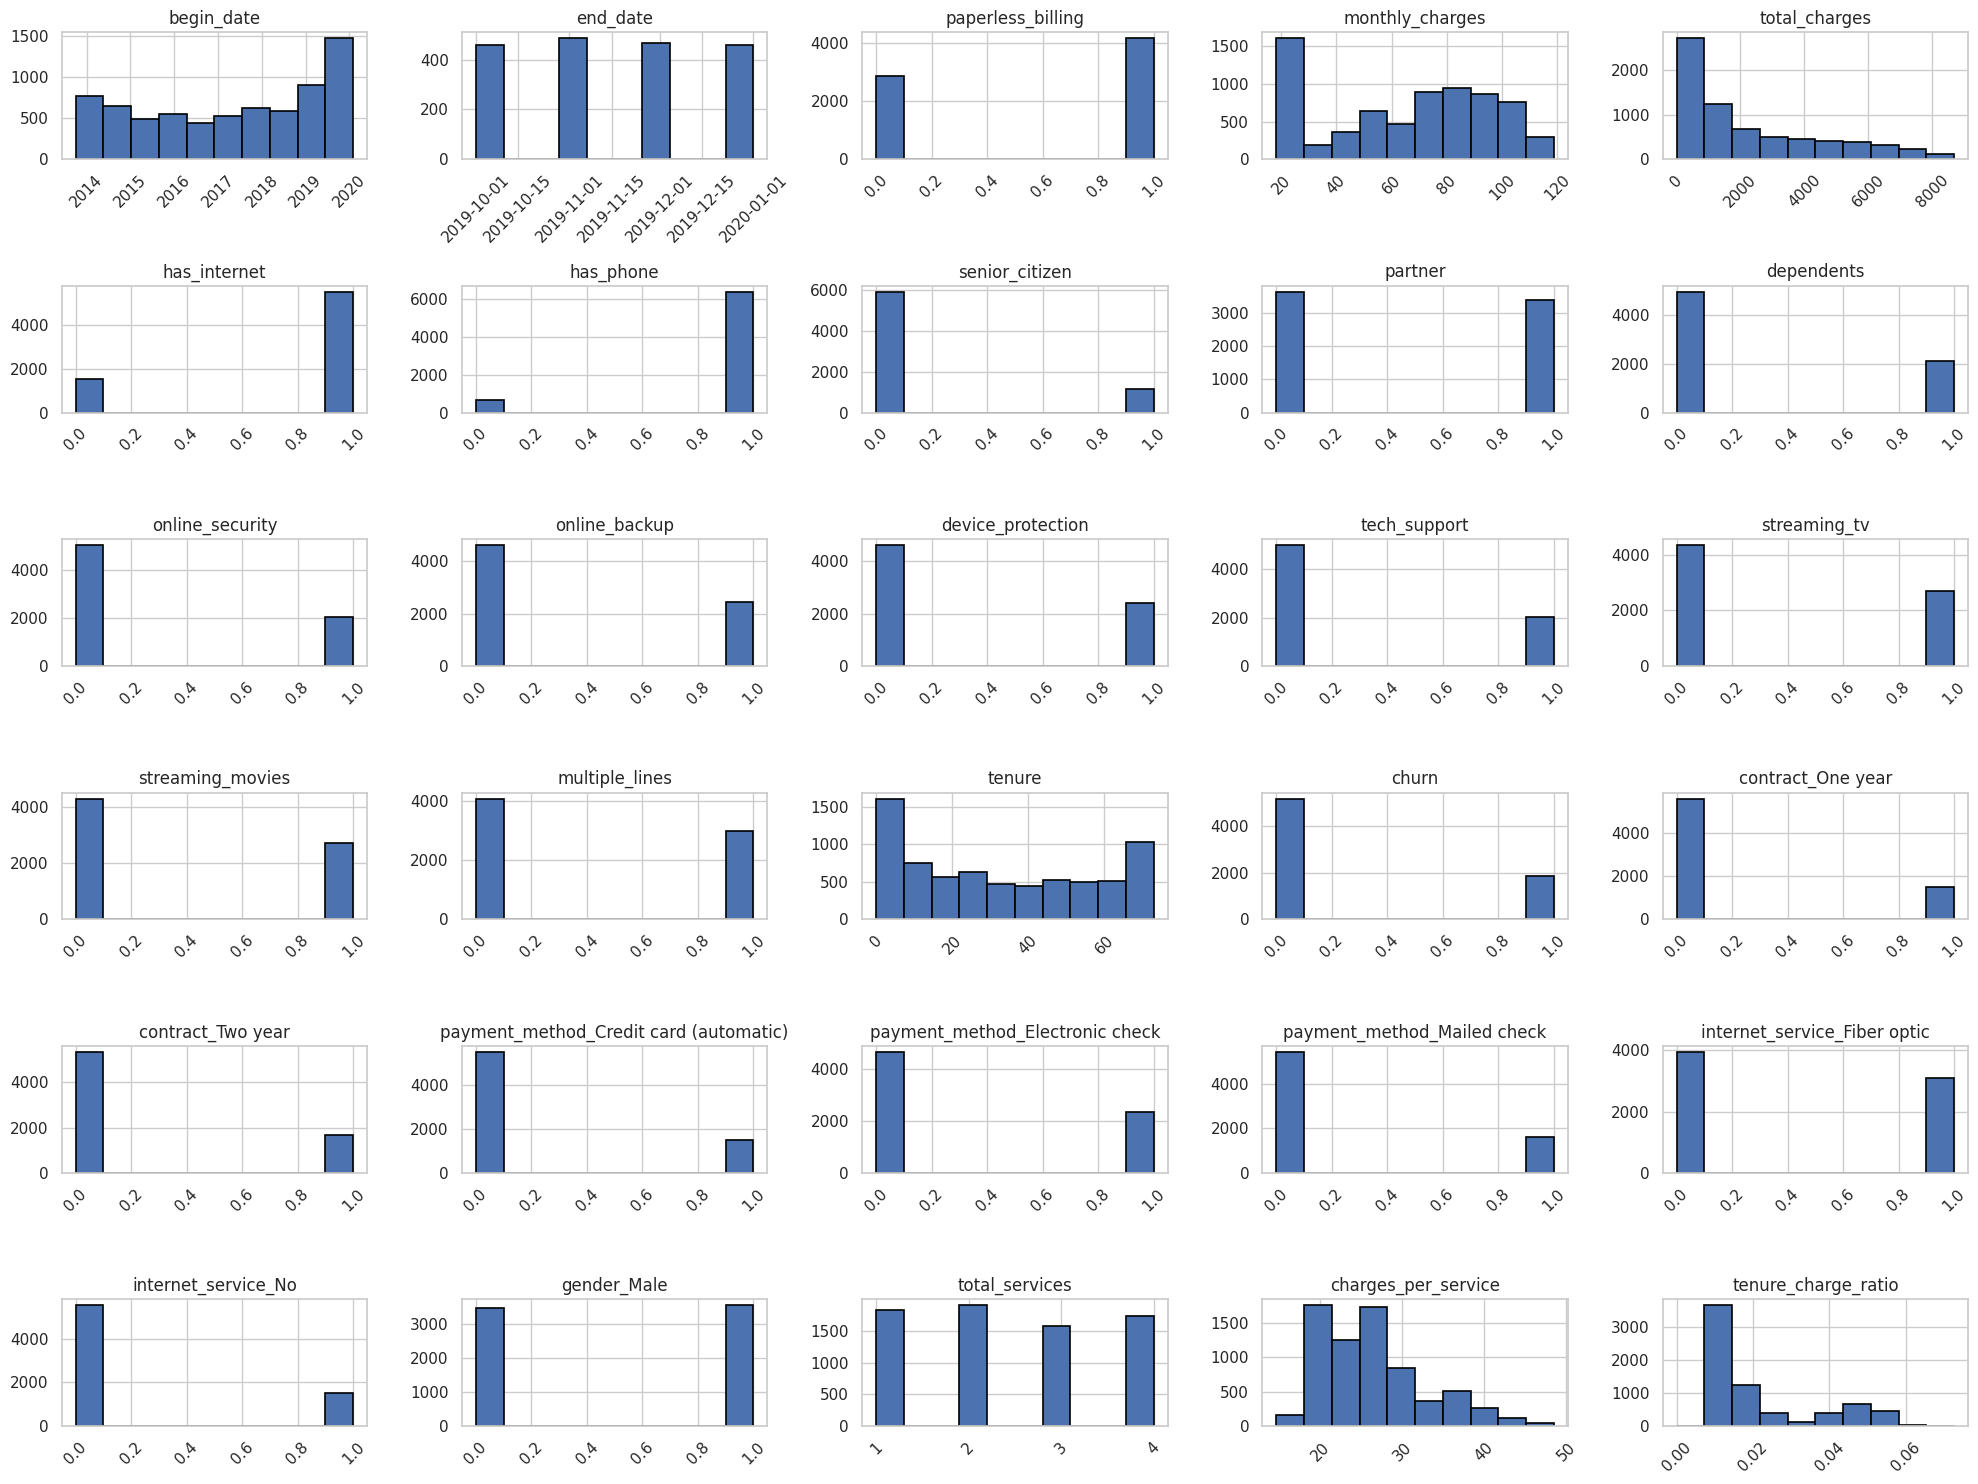

In [58]:
# Verificação com histograma
axes = df_encoded.hist(edgecolor='black', linewidth=1.2, figsize=(20, 15))

# Ajustar a rotação das labels do eixo x
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Mostrar os gráficos
plt.tight_layout()
plt.show()

**Observações:**

Ao examinar o equilíbrio das classes na coluna alvo Churn, nota-se que os dados estão desbalanceados. Aproximadamente 75% dos clientes não realizaram churn (valor 0), enquanto apenas 25% dos clientes realizaram churn (valor 1). Esse desbalanceamento pode prejudicar modelos sensíveis à distribuição de classes, pois eles podem tender a prever a maioria como "não churn". Para lidar com esse problema, podemos:

- Utilizar modelos menos sensíveis ao desbalanceamento, como árvores de decisão, florestas aleatórias ou gradient boosting.
- Implementar técnicas de upsampling (aumentar a quantidade de exemplos da classe minoritária) ou downsampling (reduzir a quantidade de exemplos da classe majoritária) para balancear as classes.

A variável monthly_charges apresenta uma distribuição com muitos clientes pagando valores baixos. A distribuição se torna mais normal à medida que as cobranças aumentam. Essa concentração de clientes com cobranças baixas pode ser um indicador importante a ser investigado mais a fundo, especialmente em relação ao churn.

### Separação em conjuntos de Treino e Teste

In [59]:
# Definindo X (features) e y (target)
X = df_encoded.drop(['customer_id', 'begin_date', 'end_date', 'churn'], axis=1)
y = df_encoded['churn']

# Verificando as dimensões de X e y
print(X.shape)
print(y.shape)

(7043, 27)
(7043,)


In [60]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Verificando as dimensões dos conjuntos de treino e teste
print("Dimensões do conjunto de treino:", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape, y_test.shape)


Dimensões do conjunto de treino: (4930, 27) (4930,)
Dimensões do conjunto de teste: (2113, 27) (2113,)


In [61]:
# Exibindo as primeiras linhas do conjunto de treino
print(X_train.head())
print(y_train.head())

      paperless_billing  monthly_charges  total_charges  has_internet  \
4890                  1            92.55        4779.45             1   
511                   1           106.45        6300.15             1   
169                   0            20.40         321.40             0   
3649                  0            25.35        1847.55             0   
1568                  1           111.40        1183.05             1   

      has_phone  senior_citizen  partner  dependents  online_security  \
4890          1               0        1           1                0   
511           1               0        0           0                1   
169           1               0        1           1                0   
3649          1               0        1           1                0   
1568          1               1        0           0                0   

      online_backup  ...  contract_Two year  \
4890              1  ...                  0   
511               0  ...    

In [62]:
# Exibindo as primeiras linhas do conjunto de treino
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 4890 to 5298
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   paperless_billing                       4930 non-null   int64  
 1   monthly_charges                         4930 non-null   float64
 2   total_charges                           4930 non-null   float64
 3   has_internet                            4930 non-null   int64  
 4   has_phone                               4930 non-null   int64  
 5   senior_citizen                          4930 non-null   int64  
 6   partner                                 4930 non-null   int64  
 7   dependents                              4930 non-null   int64  
 8   online_security                         4930 non-null   int64  
 9   online_backup                           4930 non-null   int64  
 10  device_protection                       4930 non-null   int64 

### Construção de Modelos

In [63]:
!pip install optuna

In [64]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score
import numpy as np

In [65]:
# Função para construir o pipeline de preprocessamento
def build_preprocessing_pipeline(scaling=True):
    numerical_features = [col for col in X_train.columns if X_train[col].nunique() < 10]
    categorical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64'] and X_train[col].nunique() >= 10]

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler() if scaling else 'passthrough')
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# Função para criar o pipeline com o modelo
def build_model_pipeline(model, scaling=True):
    preprocessor = build_preprocessing_pipeline(scaling)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    return pipeline


In [70]:
# Função objetivo para o Optuna
def objective(trial):
    model_type = trial.suggest_categorical('model_type', ['decision_tree', 'logistic_regression', 'random_forest', 'xgboost', 'lightgbm', 'gradient_boosting'])

    if model_type == 'decision_tree':
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = DecisionTreeClassifier(max_depth=max_depth)

    elif model_type == 'logistic_regression':
        C = trial.suggest_float('C', 0.01, 10.0)
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
        model = LogisticRegression(C=C, solver=solver)

    elif model_type == 'random_forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    elif model_type == 'xgboost':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, use_label_encoder=False, eval_metric='logloss')

    elif model_type == 'lightgbm':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        num_leaves = trial.suggest_int('num_leaves', 20, 150)
        model = LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate, num_leaves=num_leaves)

    elif model_type == 'gradient_boosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    pipeline = build_model_pipeline(model)
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=False)

    return np.mean(cv_results['test_score'])


In [71]:
# Rodar o Optuna para otimizar os hiperparâmetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Função para construir o modelo com os parâmetros específicos
def build_model_from_params(params):
    if params['model_type'] == 'decision_tree':
        model = DecisionTreeClassifier(max_depth=params['max_depth'], class_weight='balanced')
    elif params['model_type'] == 'logistic_regression':
        model = LogisticRegression(C=params['C'], solver=params['solver'], class_weight='balanced')
    elif params['model_type'] == 'random_forest':
        model = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], class_weight='balanced')
    elif params['model_type'] == 'xgboost':
        model = XGBClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'], use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
    elif params['model_type'] == 'lightgbm':
        model = LGBMClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], num_leaves=params['num_leaves'], class_weight='balanced')
    elif params['model_type'] == 'gradient_boosting':
        model = GradientBoostingClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'])

    return model


[I 2024-10-14 19:22:32,266] A new study created in memory with name: no-name-5c1e97cf-dd84-4c49-959c-a05802f574f0
[I 2024-10-14 19:22:41,527] Trial 0 finished with value: 0.8343611785700024 and parameters: {'model_type': 'random_forest', 'n_estimators': 147, 'max_depth': 27}. Best is trial 0 with value: 0.8343611785700024.


[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265467 -> initscore=-1.017747
[LightGBM] [Info] Start training from score -1.017747
[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 126
[LightGBM] [Info] [binar

[I 2024-10-14 19:22:43,242] Trial 1 finished with value: 0.8289063423415574 and parameters: {'model_type': 'lightgbm', 'n_estimators': 54, 'learning_rate': 0.01854594950785327, 'num_leaves': 57}. Best is trial 0 with value: 0.8343611785700024.


[LightGBM] [Info] Number of positive: 1046, number of negative: 2898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265213 -> initscore=-1.019047
[LightGBM] [Info] Start training from score -1.019047


[I 2024-10-14 19:22:45,399] Trial 2 finished with value: 0.8305729844607489 and parameters: {'model_type': 'random_forest', 'n_estimators': 115, 'max_depth': 7}. Best is trial 0 with value: 0.8343611785700024.
[I 2024-10-14 19:22:51,682] Trial 3 finished with value: 0.8337683876622645 and parameters: {'model_type': 'random_forest', 'n_estimators': 220, 'max_depth': 16}. Best is trial 0 with value: 0.8343611785700024.


[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265467 -> initscore=-1.017747
[LightGBM] [Info] Start training from score -1.017747
[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 126
[LightGBM] [Info] [binar

[I 2024-10-14 19:22:54,427] Trial 4 finished with value: 0.8125050305524546 and parameters: {'model_type': 'lightgbm', 'n_estimators': 242, 'learning_rate': 0.06427483971025474, 'num_leaves': 45}. Best is trial 0 with value: 0.8343611785700024.


[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265467 -> initscore=-1.017747
[LightGBM] [Info] Start training from score -1.017747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2024-10-14 19:23:00,415] Trial 5 finished with value: 0.7899143599910445 and parameters: {'model_type': 'lightgbm', 'n_estimators': 227, 'learning_rate': 0.15635781426915618, 'num_leaves': 147}. Best is trial 0 with value: 0.8343611785700024.
[I 2024-10-14 19:23:01,378] Trial 6 finished with value: 0.8236491096638268 and parameters: {'model_type': 'logistic_regression', 'C': 4.23638583651429, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8343611785700024.


[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265467 -> initscore=-1.017747
[LightGBM] [Info] Start training from score -1.017747
[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 126
[LightGBM] [Info] [binar

[I 2024-10-14 19:23:03,112] Trial 7 finished with value: 0.798130635107512 and parameters: {'model_type': 'lightgbm', 'n_estimators': 232, 'learning_rate': 0.22512623295754428, 'num_leaves': 29}. Best is trial 0 with value: 0.8343611785700024.
[I 2024-10-14 19:23:15,706] Trial 8 finished with value: 0.8338562122404962 and parameters: {'model_type': 'random_forest', 'n_estimators': 240, 'max_depth': 23}. Best is trial 0 with value: 0.8343611785700024.


[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265467 -> initscore=-1.017747
[LightGBM] [Info] Start training from score -1.017747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


[I 2024-10-14 19:23:17,509] Trial 9 finished with value: 0.7927530376560276 and parameters: {'model_type': 'lightgbm', 'n_estimators': 90, 'learning_rate': 0.2964457203831439, 'num_leaves': 124}. Best is trial 0 with value: 0.8343611785700024.
[I 2024-10-14 19:26:22,284] Trial 10 finished with value: 0.8042035080306184 and parameters: {'model_type': 'gradient_boosting', 'n_estimators': 156, 'learning_rate': 0.1253740322184286, 'max_depth': 31}. Best is trial 0 with value: 0.8343611785700024.
[I 2024-10-14 19:26:34,056] Trial 11 finished with value: 0.8351692860641957 and parameters: {'model_type': 'random_forest', 'n_estimators': 176, 'max_depth': 28}. Best is trial 11 with value: 0.8351692860641957.
[I 2024-10-14 19:28:47,271] Trial 12 finished with value: 0.786850275576682 and parameters: {'model_type': 'xgboost', 'n_estimators': 171, 'learning_rate': 0.29070935853452085, 'max_depth': 32}. Best is trial 11 with value: 0.8351692860641957.
[I 2024-10-14 19:28:48,882] Trial 13 finished 

[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265467 -> initscore=-1.017747
[LightGBM] [Info] Start training from score -1.017747
[LightGBM] [Info] Number of positive: 1047, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 126
[LightGBM] [Info] [binar

[I 2024-10-14 19:39:49,186] Trial 47 finished with value: 0.8242557101909979 and parameters: {'model_type': 'lightgbm', 'n_estimators': 59, 'learning_rate': 0.013153930368832861, 'num_leaves': 94}. Best is trial 33 with value: 0.844532147148961.


[LightGBM] [Info] Number of positive: 1046, number of negative: 2898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 126
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265213 -> initscore=-1.019047
[LightGBM] [Info] Start training from score -1.019047


[I 2024-10-14 19:39:50,193] Trial 48 finished with value: 0.7710042586623767 and parameters: {'model_type': 'decision_tree', 'max_depth': 12}. Best is trial 33 with value: 0.844532147148961.
[I 2024-10-14 19:40:02,988] Trial 49 finished with value: 0.8242518371476979 and parameters: {'model_type': 'logistic_regression', 'C': 3.813738599939111, 'solver': 'lbfgs'}. Best is trial 33 with value: 0.844532147148961.


In [72]:
# Função para calcular as métricas
def evaluate_model_with_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return roc_auc, f1, accuracy

#### Melhores 3 modelos

In [73]:
# Exibir os 3 melhores modelos e suas métricas
top_trials = sorted(study.trials, key=lambda x: x.value, reverse=True)
unique_model_types = []
top_3_trials = []

for trial in top_trials:
    if trial.params['model_type'] not in unique_model_types:
        unique_model_types.append(trial.params['model_type'])
        top_3_trials.append(trial)
    if len(top_3_trials) == 3:
        break

# Avaliar os 3 melhores modelos identificados pelo Optuna
for i, trial in enumerate(top_3_trials):
    best_params = trial.params
    print(f"Top {i+1} - Model type: {best_params['model_type']}")

    best_model = build_model_from_params(best_params)
    final_pipeline = build_model_pipeline(best_model)

    roc_auc, f1, accuracy = evaluate_model_with_metrics(final_pipeline, X_train, X_test, y_train, y_test)

    print(f"ROC AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC AUC: N/A")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("------------")

Top 1 - Model type: logistic_regression
ROC AUC: 0.8418
F1-Score: 0.6256
Accuracy: 0.7553
------------
Top 2 - Model type: gradient_boosting
ROC AUC: 0.8375
F1-Score: 0.5202
Accuracy: 0.7922
------------
Top 3 - Model type: random_forest
ROC AUC: 0.8332
F1-Score: 0.6322
Accuracy: 0.7709
------------


In [74]:
# Exibir os 3 melhores modelos e melhores parâmetros
top_trials = sorted(study.trials, key=lambda x: x.value, reverse=True)
unique_model_types = []
top_3_trials = []

for trial in top_trials:
    if trial.params['model_type'] not in unique_model_types:
        unique_model_types.append(trial.params['model_type'])
        top_3_trials.append(trial)
    if len(top_3_trials) == 3:
        break

for i, trial in enumerate(top_3_trials):
    print(f"Top {i+1}:")
    print(f"Model type: {trial.params['model_type']}")
    print(f"Score: {trial.value:.4f}")
    print(f"Params: {trial.params}")
    print("------------")

Top 1:
Model type: logistic_regression
Score: 0.8445
Params: {'model_type': 'logistic_regression', 'C': 0.13557992473080352, 'solver': 'lbfgs'}
------------
Top 2:
Model type: gradient_boosting
Score: 0.8399
Params: {'model_type': 'gradient_boosting', 'n_estimators': 120, 'learning_rate': 0.10214263963978337, 'max_depth': 2}
------------
Top 3:
Model type: random_forest
Score: 0.8366
Params: {'model_type': 'random_forest', 'n_estimators': 264, 'max_depth': 28}
------------


#### Verificação da importância das variáveis

In [75]:
!pip install shap

PermutationExplainer explainer: 2114it [07:05,  4.97it/s]


Gráfico SHAP para Top 1 - Modelo: logistic_regression


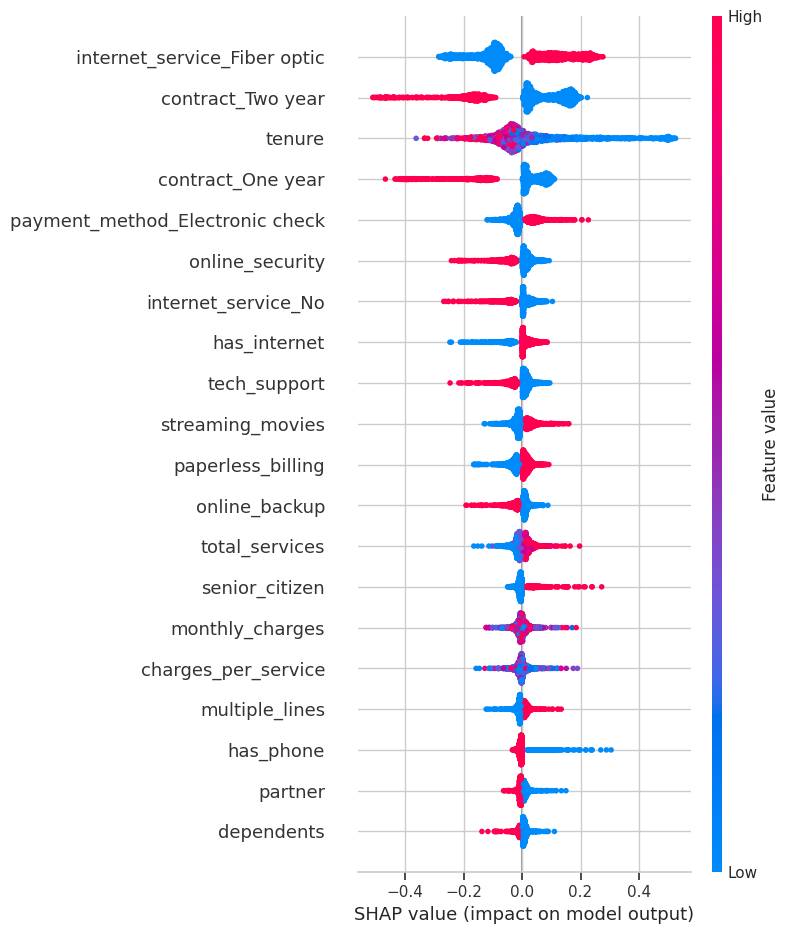

PermutationExplainer explainer: 2114it [08:16,  4.17it/s]


Gráfico SHAP para Top 2 - Modelo: gradient_boosting


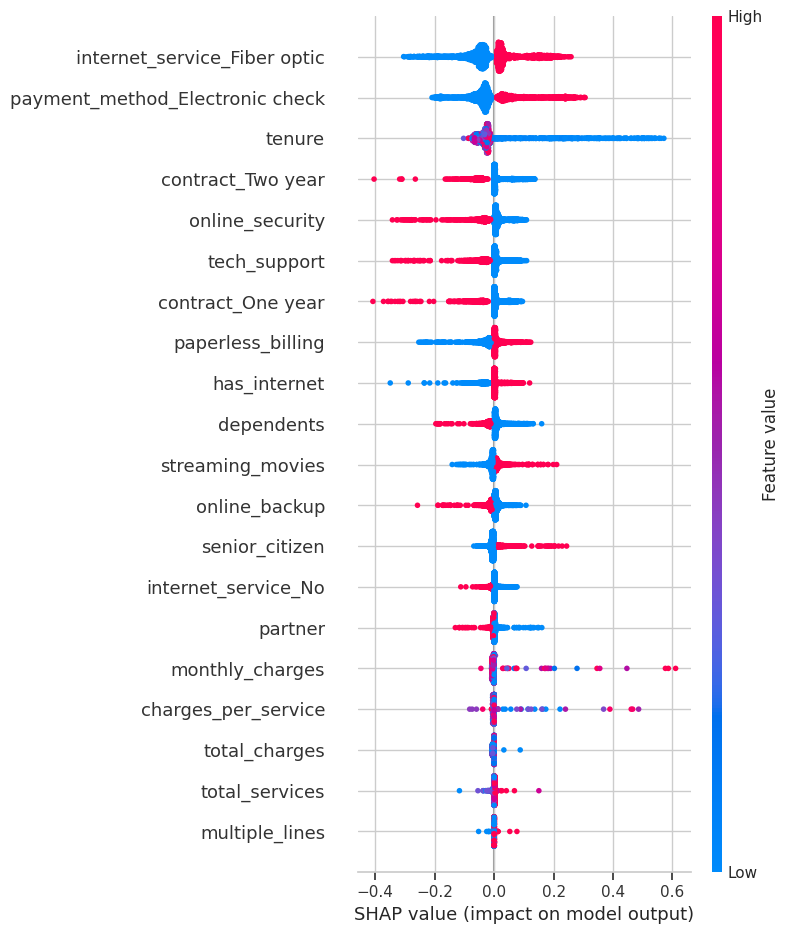

PermutationExplainer explainer: 2114it [51:22,  1.46s/it]


Gráfico SHAP para Top 3 - Modelo: random_forest


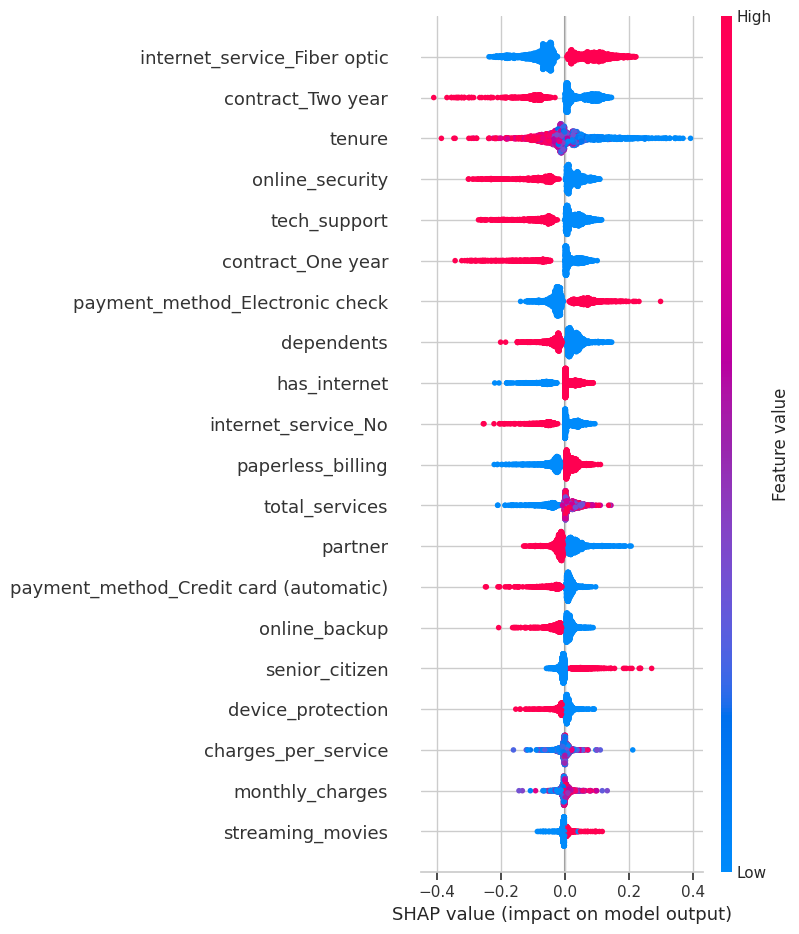

In [76]:
import shap

# Criar um explainer e calcular os valores SHAP para os 3 melhores modelos
for i, trial in enumerate(top_3_trials):
    best_params = trial.params
    best_model = build_model_from_params(best_params)
    final_pipeline = build_model_pipeline(best_model)

    # Ajustar o modelo com os dados de treino
    final_pipeline.fit(X_train, y_train)

    # Criar um explainer com base no modelo treinado
    explainer = shap.Explainer(final_pipeline.predict, X_train)

    # Calcular os valores SHAP para os dados de teste
    shap_values = explainer(X_test)

    # Visualizar a importância das variáveis com um summary plot
    print(f"Gráfico SHAP para Top {i+1} - Modelo: {best_params['model_type']}")
    shap.summary_plot(shap_values, X_test)

**Interpretação:**
- Tenure é consistentemente a variável mais importante em todos os três modelos, indicando que o tempo que um cliente permanece com o serviço é um forte indicador de churn.
- Internet_service_Fiber optic e payment_method_Electronic check são outras variáveis que afetam significativamente o churn, sugerindo que certos tipos de serviço e métodos de pagamento estão associados a uma maior probabilidade de cancelamento.
- O impacto das variáveis pode variar dependendo do modelo, indicando que diferentes algoritmos capturam padrões distintos nos dados.


<div class="alert alert-block alert-success">
<b> Comentário do Tutor: </b> <a class="tocSkip"></a>

- Muito interessante como variáveis como Fibra óptica também tem relevância para previsão. Esse é o tipo de coisa que, em um projeto real, levantaríamos para entender com o time de negócios.
</div>

##### Verificação de erros

In [103]:
X_test_df = X_test.copy()
X_test_df['true_label'] = y_test

# Fazer as previsões
X_test_df['predicted_label'] = final_pipeline.predict(X_test)

# Verificar onde o modelo acertou e onde errou
X_test_df['is_correct'] = X_test_df['true_label'] == X_test_df['predicted_label']

# Exibir as primeiras linhas do dataframe atualizado
X_test_df.head()

,paperless_billing,monthly_charges,total_charges,has_internet,has_phone,senior_citizen,partner,dependents,online_security,online_backup,...,payment_method_Mailed check,internet_service_Fiber optic,internet_service_No,gender_Male,total_services,charges_per_service,tenure_charge_ratio,true_label,predicted_label,is_correct
2937,1,92.85,5980.75,1,1,0,1,1,0,1,...,0,1,0,0,3,30.950000,0.010701,0,0,True
3276,1,79.15,317.25,1,1,0,0,0,0,0,...,0,1,0,0,3,26.383333,0.012608,1,1,True
4374,1,19.60,1387.45,0,1,0,1,1,0,0,...,0,0,1,1,1,19.600000,0.051894,0,0,True
4375,1,114.30,7383.70,1,1,0,0,0,1,1,...,0,1,0,1,4,28.575000,0.009074,0,0,True
237,1,73.15,1305.95,1,1,0,1,0,0,0,...,0,1,0,1,2,36.575000,0.013783,0,1,False


In [104]:
# Selecionar todas as colunas, exceto as colunas de 'true_label', 'predicted_label' e 'is_correct'
features = [col for col in X_test_df.columns if col not in ['true_label', 'predicted_label', 'is_correct']]

# Criar um dicionário para armazenar as taxas de acerto por coluna
accuracy_by_feature = {}

# Iterar sobre todas as colunas e calcular a taxa de acerto
for feature in features:
    # Calcular a média de 'is_correct' para cada valor único na coluna
    accuracy_per_value = X_test_df.groupby(feature)['is_correct'].mean()
    accuracy_by_feature[feature] = accuracy_per_value

# Exibir as taxas de acerto por coluna
for feature, accuracy in accuracy_by_feature.items():
    printmd(f"Feature: {feature}")
    print(accuracy)
    print("------------")


Feature: paperless_billing

paperless_billing
0    0.858960
1    0.768429
Name: is_correct, dtype: float64
------------


Feature: monthly_charges

monthly_charges
18.25     1.0
18.40     1.0
18.70     1.0
18.75     1.0
18.80     1.0
         ... 
116.60    1.0
116.75    1.0
116.85    1.0
117.35    1.0
117.80    0.0
Name: is_correct, Length: 1029, dtype: float64
------------


Feature: total_charges

total_charges
0.00       1.0
18.85      0.0
19.10      1.0
19.15      1.0
19.20      1.0
          ... 
8443.70    1.0
8476.50    1.0
8477.70    1.0
8543.25    1.0
8684.80    0.0
Name: is_correct, Length: 2059, dtype: float64
------------


Feature: has_internet

has_internet
0    0.925847
1    0.770871
Name: is_correct, dtype: float64
------------


Feature: has_phone

has_phone
0    0.803279
1    0.805699
Name: is_correct, dtype: float64
------------


Feature: senior_citizen

senior_citizen
0    0.819436
1    0.740642
Name: is_correct, dtype: float64
------------


Feature: partner

partner
0    0.773636
1    0.840079
Name: is_correct, dtype: float64
------------


Feature: dependents

dependents
0    0.784903
1    0.855519
Name: is_correct, dtype: float64
------------


Feature: online_security

online_security
0    0.792966
1    0.836634
Name: is_correct, dtype: float64
------------


Feature: online_backup

online_backup
0    0.798416
1    0.819061
Name: is_correct, dtype: float64
------------


Feature: device_protection

device_protection
0    0.785088
1    0.842953
Name: is_correct, dtype: float64
------------


Feature: tech_support

tech_support
0    0.788423
1    0.847541
Name: is_correct, dtype: float64
------------


Feature: streaming_tv

streaming_tv
0    0.815361
1    0.790049
Name: is_correct, dtype: float64
------------


Feature: streaming_movies

streaming_movies
0    0.814872
1    0.790754
Name: is_correct, dtype: float64
------------


Feature: multiple_lines

multiple_lines
0    0.801347
1    0.810811
Name: is_correct, dtype: float64
------------


Feature: tenure

tenure
0     1.000000
1     0.688235
2     0.647887
3     0.741935
4     0.634146
        ...   
69    0.793103
70    0.931034
71    0.925000
72    1.000000
73    0.954955
Name: is_correct, Length: 74, dtype: float64
------------


Feature: contract_One year

contract_One year
0    0.784901
1    0.882883
Name: is_correct, dtype: float64
------------


Feature: contract_Two year

contract_Two year
0    0.751263
1    0.967864
Name: is_correct, dtype: float64
------------


Feature: payment_method_Credit card (automatic)

payment_method_Credit card (automatic)
0    0.782263
1    0.884937
Name: is_correct, dtype: float64
------------


Feature: payment_method_Electronic check

payment_method_Electronic check
0    0.857042
1    0.701429
Name: is_correct, dtype: float64
------------


Feature: payment_method_Mailed check

payment_method_Mailed check
0    0.795426
1    0.838384
Name: is_correct, dtype: float64
------------


Feature: internet_service_Fiber optic

internet_service_Fiber optic
0    0.863751
1    0.730519
Name: is_correct, dtype: float64
------------


Feature: internet_service_No

internet_service_No
0    0.770871
1    0.925847
Name: is_correct, dtype: float64
------------


Feature: gender_Male

gender_Male
0    0.804284
1    0.806630
Name: is_correct, dtype: float64
------------


Feature: total_services

total_services
1    0.907942
2    0.732369
3    0.788009
4    0.790353
Name: is_correct, dtype: float64
------------


Feature: charges_per_service

charges_per_service
14.800000    0.0
14.833333    1.0
14.866667    1.0
14.983333    0.0
15.450000    0.0
            ... 
47.100000    1.0
47.275000    1.0
47.550000    1.0
48.175000    1.0
48.300000    1.0
Name: is_correct, Length: 1072, dtype: float64
------------


Feature: tenure_charge_ratio

tenure_charge_ratio
0.000000    1.0
0.008397    1.0
0.008405    0.0
0.008499    0.0
0.008545    1.0
           ... 
0.063593    1.0
0.064103    1.0
0.065164    1.0
0.071813    1.0
0.072314    1.0
Name: is_correct, Length: 2059, dtype: float64
------------


**Pontos Fortes**

*Taxas de acerto por feature:*

- Para algumas variáveis, como paperless_billing (taxa de acerto 84.6% para clientes que não utilizam e 67.3% para os que utilizam), o modelo apresenta boa capacidade de distinguir os clientes.
- A variável contract_Two year destaca-se com uma taxa de acerto de 96.8% para clientes que possuem contratos de dois anos, indicando que o modelo consegue identificar bem quem está menos propenso ao churn neste grupo.
Em variáveis como internet_service_Fiber optic, o modelo tem acerto razoável para quem não usa (85.1%).

*Segmentos bem modelados:*

- Clientes com maior tempo de contrato (tenure elevado) e clientes com contratos de longo prazo (contract_Two year) têm uma alta taxa de acerto, demonstrando que o modelo é eficaz na identificação de quem provavelmente não vai cancelar nesses casos.

**Pontos Fracos**

*Baixo desempenho em variáveis importantes:*

- A variável payment_method_Electronic check, que é uma das mais correlacionadas com churn, apresenta baixa taxa de acerto (56.7% para quem usa). Isso pode indicar que o modelo tem dificuldade em identificar corretamente esse grupo específico.

*Desempenho inconsistente em clientes de internet:*

- Para internet_service_Fiber optic, o modelo tem dificuldades com clientes que utilizam fibra óptica (acerto de 60.6%).


#### Subamostragem (Undersample)

In [101]:
# Verificando a distribuição da variável churn antes da divisão
printmd("Distribuição de churn antes:")
print(y.value_counts(normalize=True))


Distribuição de churn antes:

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [100]:
# Verificando a distribuição da variável churn no conjunto de treino
printmd("Distribuição de churn no conjunto de treino:")
print(y_train.value_counts(normalize=True))

# Verificando a distribuição da variável churn no conjunto de teste
printmd("Distribuição de churn no conjunto de teste:")
print(y_test.value_counts(normalize=True))


Distribuição de churn no conjunto de treino:

churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64


Distribuição de churn no conjunto de teste:

churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


In [66]:
from imblearn.under_sampling import RandomUnderSampler

# Criando uma instância do RandomUnderSampler
rus = RandomUnderSampler(random_state=123)

# Aplicando o RandomUnderSampler apenas ao conjunto de treino
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Verificando a nova distribuição da variável churn no conjunto de treino
print(y_train_resampled.value_counts(normalize=True))


churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [67]:
# Função para construir o pipeline de preprocessamento
def build_preprocessing_pipeline_balanced(scaling=True):
    numerical_features = [col for col in X_train_resampled.columns if X_train_resampled[col].nunique() < 10]
    categorical_features = [col for col in X_train_resampled.columns if X_train_resampled[col].dtype in ['int64', 'float64'] and X_train_resampled[col].nunique() >= 10]

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler() if scaling else 'passthrough')
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# Função para criar o pipeline com o modelo
def build_model_pipeline_balanced(model, scaling=True):
    preprocessor = build_preprocessing_pipeline_balanced(scaling)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    return pipeline

# Função objetivo para o Optuna (otimiza múltiplos modelos) com os dados balanceados
def objective_balanced(trial):
    model_type = trial.suggest_categorical('model_type', ['decision_tree', 'logistic_regression', 'random_forest', 'xgboost', 'lightgbm', 'gradient_boosting'])

    if model_type == 'decision_tree':
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = DecisionTreeClassifier(max_depth=max_depth)

    elif model_type == 'logistic_regression':
        C = trial.suggest_float('C', 0.01, 10.0)
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
        model = LogisticRegression(C=C, solver=solver)

    elif model_type == 'random_forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    elif model_type == 'xgboost':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, use_label_encoder=False, eval_metric='logloss')

    elif model_type == 'lightgbm':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        num_leaves = trial.suggest_int('num_leaves', 20, 150)
        model = LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate, num_leaves=num_leaves)

    elif model_type == 'gradient_boosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    pipeline = build_model_pipeline_balanced(model)
    cv_results = cross_validate(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc', return_train_score=False)

    return np.mean(cv_results['test_score'])



In [68]:
# Rodar o Optuna para otimizar os hiperparâmetros no conjunto balanceado
study_balanced = optuna.create_study(direction='maximize')
study_balanced.optimize(objective_balanced, n_trials=50)

# Função para construir o modelo com os parâmetros específicos para o estudo balanceado
def build_model_from_params_balanced(params):
    if params['model_type'] == 'decision_tree':
        model = DecisionTreeClassifier(max_depth=params['max_depth'])
    elif params['model_type'] == 'logistic_regression':
        model = LogisticRegression(C=params['C'], solver=params['solver'])
    elif params['model_type'] == 'random_forest':
        model = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'])
    elif params['model_type'] == 'xgboost':
        model = XGBClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'], use_label_encoder=False, eval_metric='logloss')
    elif params['model_type'] == 'lightgbm':
        model = LGBMClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], num_leaves=params['num_leaves'])
    elif params['model_type'] == 'gradient_boosting':
        model = GradientBoostingClassifier(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'])
    return model

# Avaliar os 3 melhores modelos identificados pelo Optuna no conjunto balanceado
top_trials_balanced = sorted(study_balanced.trials, key=lambda x: x.value, reverse=True)
unique_model_types_balanced = []
top_3_trials_balanced = []

for trial in top_trials_balanced:
    if trial.params['model_type'] not in unique_model_types_balanced:
        unique_model_types_balanced.append(trial.params['model_type'])
        top_3_trials_balanced.append(trial)
    if len(top_3_trials_balanced) == 3:
        break

# Função para calcular as métricas para o estudo balanceado
def evaluate_model_with_metrics_balanced(model, X_train_resampled, X_test, y_train_resampled, y_test):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return roc_auc, f1, accuracy




[I 2024-10-14 18:35:48,787] A new study created in memory with name: no-name-92251b6f-c830-4ad5-94ca-39c2ce110f64
[I 2024-10-14 18:38:19,765] Trial 0 finished with value: 0.8085351854791483 and parameters: {'model_type': 'gradient_boosting', 'n_estimators': 252, 'learning_rate': 0.15772356221645337, 'max_depth': 28}. Best is trial 0 with value: 0.8085351854791483.
[I 2024-10-14 18:38:20,168] Trial 1 finished with value: 0.8000645286101584 and parameters: {'model_type': 'decision_tree', 'max_depth': 6}. Best is trial 0 with value: 0.8085351854791483.
[I 2024-10-14 18:38:21,108] Trial 2 finished with value: 0.7012596279410166 and parameters: {'model_type': 'decision_tree', 'max_depth': 26}. Best is trial 0 with value: 0.8085351854791483.
[I 2024-10-14 18:38:58,014] Trial 3 finished with value: 0.8096577243107367 and parameters: {'model_type': 'gradient_boosting', 'n_estimators': 145, 'learning_rate': 0.21977725322003025, 'max_depth': 13}. Best is trial 3 with value: 0.8096577243107367.


[LightGBM] [Info] Number of positive: 1046, number of negative: 1046
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2024-10-14 18:39:01,387] Trial 4 finished with value: 0.7716007750354374 and parameters: {'model_type': 'lightgbm', 'n_estimators': 292, 'learning_rate': 0.23621140496724338, 'num_leaves': 106}. Best is trial 3 with value: 0.8096577243107367.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-14 18:39:45,369] Trial 5 finished with value: 0.8132755684780223 and parameters: {'model_type': 'xgboost', 'n_estimators': 151, 'learning_rate': 0.013394658200383233, 'max_depth': 10}. Best is trial 5 with value: 0.8132755684780223.
[I 2024-10-14 18:40:13,116] Trial 6 finished with value: 0.8126800086447462 and parameters: {'model_type': 'gradient_boosting', 'n_estimators': 101, 'learning_rate': 0.06912964294246499, 'max_depth': 11}. Best is trial 5 with value: 0.8132755684780223.


[LightGBM] [Info] Number of positive: 1046, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-10-14 18:40:15,831] Trial 7 finished with value: 0.7869631667277291 and parameters: {'model_type': 'lightgbm', 'n_estimators': 250, 'learning_rate': 0.10382463464149741, 'num_leaves': 139}. Best is trial 5 with value: 0.8132755684780223.


[LightGBM] [Info] Number of positive: 1046, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1047, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=

[I 2024-10-14 18:40:16,848] Trial 8 finished with value: 0.7987407236983259 and parameters: {'model_type': 'lightgbm', 'n_estimators': 55, 'learning_rate': 0.20262074085330928, 'num_leaves': 72}. Best is trial 5 with value: 0.8132755684780223.


[LightGBM] [Info] Number of positive: 1046, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-10-14 18:40:18,514] Trial 9 finished with value: 0.7875488471699509 and parameters: {'model_type': 'lightgbm', 'n_estimators': 130, 'learning_rate': 0.15462863994151313, 'num_leaves': 150}. Best is trial 5 with value: 0.8132755684780223.
[I 2024-10-14 18:40:20,471] Trial 10 finished with value: 0.8305051148454095 and parameters: {'model_type': 'xgboost', 'n_estimators': 196, 'learning_rate': 0.01830373484844912, 'max_depth': 2}. Best is trial 10 with value: 0.8305051148454095.
[I 2024-10-14 18:40:26,390] Trial 11 finished with value: 0.8278211187221494 and parameters: {'model_type': 'xgboost', 'n_estimators': 195, 'learning_rate': 0.010906154876016573, 'max_depth': 3}. Best is trial 10 with value: 0.8305051148454095.
[I 2024-10-14 18:40:28,131] Trial 12 finished with value: 0.8261425041320413 and parameters: {'model_type': 'xgboost', 'n_estimators': 204, 'learning_rate': 0.010919160859561669, 'max_depth': 2}. Best is trial 10 with value: 0.8305051148454095.
[I 2024-10-14 18:40:

[LightGBM] [Info] Number of positive: 1046, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1047, number of negative: 1046
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500239 -> initscore=0.000956
[LightGBM] [Info] Start training from score 0.000956
[LightGBM] [I

[I 2024-10-14 18:48:22,180] Trial 45 finished with value: 0.8113836427647916 and parameters: {'model_type': 'lightgbm', 'n_estimators': 265, 'learning_rate': 0.056545072722950285, 'num_leaves': 20}. Best is trial 29 with value: 0.834012912643187.


[LightGBM] [Info] Number of positive: 1046, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499761 -> initscore=-0.000956
[LightGBM] [Info] Start training from score -0.000956


[I 2024-10-14 18:48:23,848] Trial 46 finished with value: 0.8274099797701329 and parameters: {'model_type': 'xgboost', 'n_estimators': 210, 'learning_rate': 0.181587422216267, 'max_depth': 2}. Best is trial 29 with value: 0.834012912643187.
[I 2024-10-14 18:48:37,029] Trial 47 finished with value: 0.8282000631387975 and parameters: {'model_type': 'gradient_boosting', 'n_estimators': 156, 'learning_rate': 0.08688728246739341, 'max_depth': 4}. Best is trial 29 with value: 0.834012912643187.


[LightGBM] [Info] Number of positive: 1046, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1047, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500239 -> initscore=0.000956
[L

[I 2024-10-14 18:48:38,018] Trial 48 finished with value: 0.8254012149083472 and parameters: {'model_type': 'lightgbm', 'n_estimators': 188, 'learning_rate': 0.02666196019606493, 'num_leaves': 22}. Best is trial 29 with value: 0.834012912643187.


[LightGBM] [Info] Number of positive: 1046, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499761 -> initscore=-0.000956
[LightGBM] [Info] Start training from score -0.000956


[I 2024-10-14 18:48:44,088] Trial 49 finished with value: 0.8262242798147185 and parameters: {'model_type': 'random_forest', 'n_estimators': 142, 'max_depth': 28}. Best is trial 29 with value: 0.834012912643187.


Top 1 - Model type: logistic_regression
ROC AUC: 0.8414
F1-Score: 0.6263
Accuracy: 0.7459
------------
Top 2 - Model type: xgboost
ROC AUC: 0.8385
F1-Score: 0.6306
Accuracy: 0.7482
------------
Top 3 - Model type: gradient_boosting
ROC AUC: 0.8375
F1-Score: 0.6236
Accuracy: 0.7435
------------


In [98]:
# Avaliar os 3 melhores modelos do conjunto balanceado
for i, trial in enumerate(top_3_trials_balanced):
    best_params_balanced = trial.params
    printmd(f"Top {i+1} - Model type: {best_params_balanced['model_type']}")

    best_model_balanced = build_model_from_params_balanced(best_params_balanced)
    final_pipeline_balanced = build_model_pipeline_balanced(best_model_balanced)

    roc_auc, f1, accuracy = evaluate_model_with_metrics_balanced(final_pipeline_balanced, X_train_resampled, X_test, y_train_resampled, y_test)

    print(f"ROC AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC AUC: N/A")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("------------")

Top 1 - Model type: logistic_regression


ROC AUC: 0.8414

F1-Score: 0.6263
Accuracy: 0.7459
------------
Top 2 - Model type: xgboost


ROC AUC: 0.8385

F1-Score: 0.6306
Accuracy: 0.7482
------------
Top 3 - Model type: gradient_boosting


ROC AUC: 0.8371

F1-Score: 0.6249
Accuracy: 0.7449
------------


In [105]:
# Exibir os 3 melhores modelos e melhores parâmetros no conjunto balanceado
top_trials_balanced = sorted(study_balanced.trials, key=lambda x: x.value, reverse=True)
unique_model_types_balanced = []
top_3_trials_balanced = []

for trial in top_trials_balanced:
    if trial.params['model_type'] not in unique_model_types_balanced:
        unique_model_types_balanced.append(trial.params['model_type'])
        top_3_trials_balanced.append(trial)
    if len(top_3_trials_balanced) == 3:
        break

# Exibir os 3 melhores modelos e seus parâmetros para o estudo balanceado
for i, trial in enumerate(top_3_trials_balanced):
    print(f"Top {i+1}:")
    print(f"Model type: {trial.params['model_type']}")
    print(f"Score: {trial.value:.4f}")
    print(f"Params: {trial.params}")
    print("------------")


Top 1:
Model type: logistic_regression
Score: 0.8340
Params: {'model_type': 'logistic_regression', 'C': 0.23823261810303453, 'solver': 'lbfgs'}
------------
Top 2:
Model type: xgboost
Score: 0.8333
Params: {'model_type': 'xgboost', 'n_estimators': 198, 'learning_rate': 0.06082648786948532, 'max_depth': 2}
------------
Top 3:
Model type: gradient_boosting
Score: 0.8303
Params: {'model_type': 'gradient_boosting', 'n_estimators': 172, 'learning_rate': 0.13975967090593527, 'max_depth': 2}
------------


#### Identificar as variáveis mais importantes

In [96]:
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer

# Separando entre variáveis numéricas e categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

# Definindo o preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Criando o modelo de Regressão Logística
logistic_model = LogisticRegression(C=0.23823261810303453, solver='lbfgs')

# Criando o pipeline com o preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_model)
])

# Definindo o número de features que deseja selecionar
n_features_to_select = 10  # Aqui você pode definir quantas features deseja selecionar

# Aplicando o RFE com Regressão Logística
rfe = RFE(estimator=logistic_model, n_features_to_select=n_features_to_select)

# Criando um pipeline onde o RFE será aplicado após o pré-processamento
rfe_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', rfe)
])

# Ajustando o pipeline com os dados de treino
rfe_pipeline.fit(X_train, y_train)

# Obtendo as features selecionadas
selected_features = X_train.columns[rfe.support_]

printmd(f"As {n_features_to_select} features mais importantes são:")
print(selected_features)


As 10 features mais importantes são:

Index(['total_charges', 'has_internet', 'online_security', 'tenure',
       'contract_One year', 'contract_Two year',
       'payment_method_Electronic check', 'internet_service_Fiber optic',
       'internet_service_No', 'charges_per_service'],
      dtype='object')


#### Identificar os clientes com maior propensão ao churn

In [78]:
# Treinando o modelo final com os melhores parâmetros encontrados
best_model = build_model_from_params(best_params)
best_pipeline = build_model_pipeline(best_model)

# Ajustando o pipeline ao conjunto de treinamento resampleado
best_pipeline.fit(X_train_resampled, y_train_resampled)

# Obtendo as probabilidades de churn para o conjunto de teste
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probabilidade de churn


In [79]:
# Adicionando as probabilidades de churn ao DataFrame de teste
X_test['churn_probability'] = y_pred_proba
X_test['churn_actual'] = y_test.values

# Ordenando os clientes pela probabilidade de churn (do maior para o menor)
top_customers = X_test.sort_values(by='churn_probability', ascending=False)


In [80]:
# Ordenando os clientes pela probabilidade de churn (do maior para o menor)
top_customers = X_test.sort_values(by='churn_probability', ascending=False)

# Exibindo os 10 clientes com maior probabilidade de churn
top_customers.head(10)


,paperless_billing,monthly_charges,total_charges,has_internet,has_phone,senior_citizen,partner,dependents,online_security,online_backup,...,payment_method_Electronic check,payment_method_Mailed check,internet_service_Fiber optic,internet_service_No,gender_Male,total_services,charges_per_service,tenure_charge_ratio,churn_probability,churn_actual
5783,1,89.30,89.30,1,1,1,0,0,0,0,...,1,0,1,0,0,4,22.325000,0.011198,0.833118,1
4585,1,85.05,85.05,1,1,1,0,0,0,0,...,1,0,1,0,0,3,28.350000,0.011758,0.827725,1
5165,1,69.65,69.65,1,1,1,0,0,0,0,...,1,0,1,0,1,2,34.825000,0.014358,0.827078,1
5825,1,70.30,70.30,1,1,1,1,0,0,0,...,1,0,1,0,1,2,35.150000,0.014225,0.821734,1
5481,1,73.65,73.65,1,1,1,0,0,0,0,...,1,0,1,0,1,2,36.825000,0.013578,0.819698,1
6623,1,76.45,76.45,1,1,1,0,0,0,0,...,1,0,1,0,1,2,38.225000,0.013080,0.819698,1
2366,1,70.15,70.15,1,1,1,0,0,0,0,...,1,0,1,0,0,2,35.075000,0.014255,0.818470,1
7032,1,75.75,75.75,1,1,1,0,0,0,0,...,1,0,1,0,1,2,37.875000,0.013201,0.816941,1
534,1,85.00,85.00,1,1,0,0,0,0,0,...,1,0,1,0,0,3,28.333333,0.011765,0.810312,1
5140,1,89.25,89.25,1,1,0,0,0,0,0,...,1,0,1,0,1,4,22.312500,0.011204,0.809903,0


### Parte 3 - Relatório Final

# Pontos fortes e fracos dos modelos

### Regressão Logística (Logistic Regression)

**Pontos Fortes:**
- Consistentemente lidera o ranking, tanto antes quanto depois da reamostragem, com um AUC ROC de 0.8418 (antes) e 0.8414 (depois), o que sugere uma boa separação entre classes.
- Apresenta F1-Score sólido em ambas as situações, com 0.6256 (antes) e 0.6263 (depois), sendo uma métrica relevante por considerar precisão e recall.
- **Precisão (Accuracy):** Mantém uma performance robusta com 75.53% (antes) e 74.59% (depois) de acurácia, oferecendo boa confiabilidade global.
- A simplicidade do modelo facilita a interpretabilidade, permitindo identificar de forma clara quais variáveis são mais relevantes para a previsão.

**Pontos Fracos:**
- Embora o desempenho geral seja bom, não aproveita plenamente interações complexas entre características como modelos de árvore (e.g., XGBoost e Gradient Boosting). Isso pode limitar a capacidade de capturar relações mais complexas.
- Pode ser sensível a dados desbalanceados, e mesmo após o balanceamento dos dados (undersampling), não houve um ganho expressivo nas métricas, sugerindo certa limitação ao lidar com o dataset.

### Gradient Boosting

**Pontos Fortes:**
- A AUC ROC de 0.8375 (antes) e 0.8375 (depois) demonstra que o modelo é capaz de distinguir bem as classes, oferecendo performance próxima à da regressão logística.
- Após o balanceamento dos dados, o F1-Score aumentou para 0.6236, mostrando uma leve melhora na captura de falsos positivos e negativos.
- Accuracy relativamente alta, com 79.22% (antes) e 74.35% (depois), o que o torna um modelo competitivo, especialmente em cenários de dados balanceados.

**Pontos Fracos:**
- Apresenta F1-Score mais baixo antes do undersampling (0.5202), sugerindo uma performance um pouco pior em relação ao equilíbrio entre precisão e recall quando os dados estavam desbalanceados.
- Tem maior custo computacional comparado à regressão logística, especialmente em datasets maiores, exigindo mais tempo de treinamento.
- Tende a sofrer mais com overfitting quando não ajustado adequadamente, dado que sua complexidade pode capturar detalhes específicos do conjunto de treino.

### XGBoost

**Pontos Fortes:**
- A AUC ROC de 0.8385 após o undersampling mostra uma forte capacidade de classificação, sendo o segundo melhor modelo após a regressão logística.
- O F1-Score (0.6306) foi o melhor após o balanceamento, indicando que o modelo se beneficiou da reamostragem e lidou melhor com falsos positivos e negativos.
- Accuracy de 74.82% o posiciona como uma escolha competitiva em termos de precisão global.
- Excelente para capturar interações entre variáveis e padrões complexos nos dados, especialmente útil em cenários com muitas características.

**Pontos Fracos:**
- Antes do balanceamento, não figurou entre os melhores modelos, sugerindo que, inicialmente, ele pode ser sensível ao desbalanceamento de classes.
- Similar ao Gradient Boosting, demanda um tempo de processamento considerável, o que pode ser uma desvantagem em aplicações em tempo real ou quando há necessidade de múltiplas iterações rápidas.

# Conclusão geral

Este projeto teve como objetivo prever a rotatividade de clientes (churn) de uma operadora de telecomunicações, utilizando dados contratuais, pessoais e de serviços de internet e telefonia. Ao longo do desenvolvimento, utilizamos diversas técnicas de ciência de dados e aprendizado de máquina, desde a exploração inicial dos dados até a seleção e otimização dos modelos preditivos.

### Etapas principais de resolução da tarefa

1. **Exploração e Preparação de Dados:**
   Realizou-se uma análise exploratória dos dados, tratando variáveis categóricas e numéricas, além de aplicar técnicas de resampling para lidar com o desbalanceamento de classes no conjunto de dados de treinamento.

2. **Seleção e Treinamento de Modelos:**
   Testando diferentes modelos de machine learning, como Regressão Logística, Random Forest, Gradient Boosting e XGBoost. Em seguida, foi utilizado o Optuna para otimizar os hiperparâmetros e selecionar os modelos com melhor desempenho.

3. **Análise de Importância das Variáveis:**
   Utilizou-se métodos como Recursive Feature Elimination (RFE) e SHAP para identificar as variáveis mais importantes que influenciam o churn. Essa análise ajudou a compreender o impacto de características específicas nas previsões.

4. **Avaliação e Validação:**
   Os modelos foram avaliados com base em métricas como AUC ROC, F1-Score e Accuracy. A validação cruzada foi aplicada para garantir a robustez e a generalização dos resultados.

5. **Geração de Insights Estratégicos:**
   As previsões de churn foram analisadas, permitindo identificar os clientes com maior probabilidade de cancelamento. Essas informações fornecem subsídios para ações estratégicas da operadora, com foco em retenção de clientes.


### Principais resultados

Após a implementação de diferentes modelos, incluindo Regressão Logística, XGBoost,  Gradient Boosting entre outros, o modelo de **Regressão Logística** apresentou o melhor desempenho com uma **AUC ROC de 0.8414**, **F1-Score de 0.6263** e **acurácia de 0.7459**, sendo escolhido como o modelo final para prever o churn.

Além disso, ao utilizar técnicas como **Recursive Feature Elimination (RFE)**, foi identificado as 10 variáveis mais importantes para a previsão de churn, sendo elas:

1. **total_charges** - O valor total cobrado ao cliente ao longo do contrato.
2. **has_internet** - Indica se o cliente possui serviço de internet.
3. **online_security** - Indica se o cliente possui serviço de segurança online.
4. **tenure** - Tempo total de contrato do cliente.
5. **contract_One year** - Contratos com duração de 1 ano.
6. **contract_Two year** - Contratos com duração de 2 anos.
7. **payment_method_Electronic check** - Método de pagamento por cheque eletrônico.
8. **internet_service_Fiber optic** - Clientes que utilizam internet de fibra óptica.
9. **internet_service_No** - Clientes que não possuem serviço de internet.
10. **charges_per_service** - Valor cobrado por serviço.

### Utilização das Features mais importantes
A identificação dessas variáveis permitiu uma compreensão mais profunda dos fatores que levam ao churn. Entre os principais insights, destacam-se:

- Clientes com contratos de curto prazo (1 ano ou menos) e com menor tempo de permanência (tenure) estão mais propensos a cancelar, o que sugere a necessidade de políticas de fidelização.
- O uso de serviços de internet, especialmente internet de fibra óptica, e a presença de serviços de segurança online também são fatores decisivos, indicando que a satisfação com a qualidade dos serviços influencia diretamente a retenção.
- Clientes que utilizam **cheque eletrônico** como método de pagamento demonstram maior probabilidade de churn, sugerindo que oferecer métodos de pagamento mais práticos pode aumentar a satisfação.

### Aplicações Práticas

Com base nesses resultados, a operadora pode adotar uma série de ações proativas para mitigar o churn:

- **Campanhas de retenção** direcionadas para clientes com maior probabilidade de churn, baseadas nas features identificadas, oferecendo descontos, melhorias de serviço ou contratos mais flexíveis.
- **Monitoramento contínuo** dos clientes com alto risco de churn para intervenções antecipadas.
- **Ajuste de ofertas** em pacotes de internet e segurança, focando nos perfis que mais cancelam os serviços.

### Limitações e Próximos Passos

Embora o modelo de Regressão Logística tenha apresentado bons resultados, há espaço para melhoria, como explorar modelos mais complexos ou realizar uma análise mais aprofundada das interações entre as variáveis. Além disso, futuras iterações podem considerar a inclusão de mais dados externos, como feedback de clientes, para aprimorar a capacidade de previsão.

Em resumo, este projeto demonstrou a importância de uma abordagem sistemática na identificação e retenção de clientes propensos ao churn, utilizando técnicas de aprendizado de máquina e uma análise criteriosa das variáveis mais relevantes.


<div class="alert alert-block alert-success">
<b> Comentário do Tutor: </b> <a class="tocSkip"></a>

- Essa sua conclusão ficou INCRÍVEL. Parabéns
</div>